In [ ]:
!pip install pyswarms

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(CertificateError("hostname 'pypi.org' doesn't match either of '*.bozok.edu.tr', 'bozok.edu.tr'",),)) - skipping


In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from time import time
from functools import partial
from functools import partial
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO
from sklearn.model_selection import cross_val_score

In [ ]:
# Load the dataset
data = pd.read_csv('../Sylhet.csv')

In [ ]:
sutunlar=['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden_weight_loss','weakness', 'Polyphagia', 'Genital_thrush', 'visual_blurring','Itching', 'Irritability', 'delayed_healing', 'partial_paresis','muscle_stiffness', 'Alopecia', 'Obesity', 'Class']
data.columns=sutunlar
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,Class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
from sklearn import preprocessing
labelencoder=preprocessing.LabelEncoder()
data.Gender=labelencoder.fit_transform(data['Gender'])
data.Polyuria=labelencoder.fit_transform(data['Polyuria'])
data.Polydipsia=labelencoder.fit_transform(data['Polydipsia'])
data.sudden_weight_loss=labelencoder.fit_transform(data['sudden_weight_loss'])
data.weakness=labelencoder.fit_transform(data['weakness'])
data.Polyphagia=labelencoder.fit_transform(data['Polyphagia'])
data.Genital_thrush=labelencoder.fit_transform(data['Genital_thrush'])
data.visual_blurring=labelencoder.fit_transform(data['visual_blurring'])
data.Itching=labelencoder.fit_transform(data['Itching'])
data.Irritability=labelencoder.fit_transform(data['Irritability'])
data.delayed_healing=labelencoder.fit_transform(data['delayed_healing'])
data.partial_paresis=labelencoder.fit_transform(data['partial_paresis'])
data.muscle_stiffness=labelencoder.fit_transform(data['muscle_stiffness'])
data.Alopecia=labelencoder.fit_transform(data['Alopecia'])
data.Obesity=labelencoder.fit_transform(data['Obesity'])
data.Class=labelencoder.fit_transform(data['Class'])
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital_thrush,visual_blurring,Itching,Irritability,delayed_healing,partial_paresis,muscle_stiffness,Alopecia,Obesity,Class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
data.shape #veri setinde kaç veri kaç sütun var gösterir.

(520, 17)

In [ ]:
print(data.groupby('Class').size()) #toplam çıktı sayılarını yazdırır.

Class
0    200
1    320
dtype: int64


In [ ]:
y = data['Class']
X = data.drop(['Class'],axis=1)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve,classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import time
def evaluate_model(model, data_x, data_y):
    k_fold = KFold(5, shuffle=True, random_state=1)

    predicted_targets = np.array([])
    actual_targets = np.array([])

    TN = np.array([])
    TP = np.array([])
    FP = np.array([])
    FN = np.array([])
    F1_Score = np.array([])
    Recal_Score = np.array([])

    Train_ACC =np.array([])
    Test_ACC = np.array([])

    Precision_Score = np.array([])
    Train_Times = np.array([])
    Test_Times = np.array([])

    AUCS = np.array([])

    false_positive_rates = np.array([])
    true_positive_rates = np.array([])
    FPR1 = np.array([])
    FPR2 = np.array([])
    FPR3 = np.array([])

    TPR1 = np.array([])
    TPR2 = np.array([])
    TPR3 = np.array([])

    A_class_0_precision =  np.array([])
    A_class_0_recall =  np.array([])
    A_class_0_f1_score =  np.array([])
    A_class_0_support =  np.array([])
    A_class_1_precision =  np.array([])
    A_class_1_recall =  np.array([])
    A_class_1_f1_score =  np.array([])
    A_class_1_support =  np.array([])
    A_clf_report_acc = np.array([])
    A_class_macro_avg_precision =  np.array([])
    A_class_macro_avg_recall =  np.array([])
    A_class_macro_avg_f1_score =  np.array([])
    A_class_macro_avg_support =  np.array([])
    A_class_weighted_avg_precision =  np.array([])
    A_class_weighted_avg_recall =  np.array([])
    A_class_weighted_avg_f1_score =  np.array([])
    A_class_weighted_avg_support =  np.array([])
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    for train_ix, test_ix in k_fold.split(data_x):
        train_x, train_y, test_x, test_y = data_x.iloc[train_ix], data_y.iloc[train_ix], data_x.iloc[test_ix], data_y.iloc[test_ix]

        # Fit the classifier
        t0 = time.time()
        classifier = model.fit(train_x, train_y)
        train_time = time.time() - t0

        # Predict the labels of the test set samples
        t0 = time.time()
        predicted_labels = classifier.predict(test_x)
        test_time = time.time() - t0
        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, test_y)

        target_names = ['class_0','class_1']
        clf_rept = classification_report(predicted_labels, test_y, output_dict=True)


        class_0_precision =  clf_rept['0']['precision']
        class_0_recall =  clf_rept['0']['recall']
        class_0_f1_score =  clf_rept['0']['f1-score']
        class_0_support =  clf_rept['0']['support']

        class_1_precision =  clf_rept['1']['precision']
        class_1_recall =  clf_rept['1']['recall']
        class_1_f1_score =  clf_rept['1']['f1-score']
        class_1_support =  clf_rept['1']['support']

        clf_report_acc = clf_rept['accuracy']

        class_macro_avg_precision =  clf_rept['macro avg']['precision']
        class_macro_avg_recall =  clf_rept['macro avg']['recall']
        class_macro_avg_f1_score =  clf_rept['macro avg']['f1-score']
        class_macro_avg_support =  clf_rept['macro avg']['support']

        class_weighted_avg_precision =  clf_rept['weighted avg']['precision']
        class_weighted_avg_recall =  clf_rept['weighted avg']['recall']
        class_weighted_avg_f1_score =  clf_rept['weighted avg']['f1-score']
        class_weighted_avg_support =  clf_rept['weighted avg']['support']

        #add to

        A_class_0_precision = np.append(A_class_0_precision,class_0_precision)
        A_class_0_recall = np.append(A_class_0_recall,class_0_recall)
        A_class_0_f1_score = np.append(A_class_0_f1_score,class_0_f1_score)
        A_class_0_support = np.append(A_class_0_support,class_0_support)

        A_class_1_precision = np.append(A_class_1_precision,class_1_precision)
        A_class_1_recall = np.append(A_class_1_recall,class_1_recall)
        A_class_1_f1_score = np.append(A_class_1_f1_score,class_1_f1_score)
        A_class_1_support = np.append(A_class_1_support,class_1_support)

        A_clf_report_acc = np.append(A_clf_report_acc,clf_report_acc)

        A_class_macro_avg_precision = np.append(A_class_macro_avg_precision,class_macro_avg_precision)
        A_class_macro_avg_recall = np.append(A_class_macro_avg_recall,class_macro_avg_recall)
        A_class_macro_avg_f1_score = np.append(A_class_macro_avg_f1_score,class_macro_avg_f1_score)
        A_class_macro_avg_support = np.append(A_class_macro_avg_support,class_macro_avg_support)
        A_class_weighted_avg_precision = np.append(A_class_weighted_avg_precision,class_weighted_avg_precision)
        A_class_weighted_avg_recall = np.append(A_class_weighted_avg_recall,class_weighted_avg_recall)
        A_class_weighted_avg_f1_score = np.append(A_class_weighted_avg_f1_score,class_weighted_avg_f1_score)
        A_class_weighted_avg_support = np.append(A_class_weighted_avg_support,class_weighted_avg_support)
        tn, fp, fn, tp = confusion_matrix(predicted_labels, test_y).ravel()

        f1 = f1_score(test_y, predicted_labels,average='micro')

        recall = recall_score(test_y, predicted_labels)

        test_Acc = accuracy_score(test_y, predicted_labels)
        precisionScore = precision_score(test_y, predicted_labels)
        #train acc
        trainPred = classifier.predict(train_x)
        train_acc = accuracy_score(trainPred, train_y)

        auc = metrics.roc_auc_score(test_y, predicted_labels)


        false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(test_y, predicted_labels)


        print('false_positive_rate len: ',len(false_positive_rate))
        print("k fold true_positive_rate:", true_positive_rate)
        print("k fold false_positive_rate:", false_positive_rate)

        fpr1 = false_positive_rate[0]


        fpr2 = false_positive_rate[1]
        try:
          fpr3 = false_positive_rate[2]
          FPR3 = np.append(FPR3,fpr3)
        except Exception as e:
          print(e)

        tpr1 = true_positive_rate[0]
        tpr2 = true_positive_rate[1]
        try:
          tpr3 = true_positive_rate[2]
          TPR3 = np.append(TPR3,tpr3)
        except Exception as e:
          print(e)


        FPR1 = np.append(FPR1,fpr1)
        FPR2 = np.append(FPR2,fpr2)


        TPR1 = np.append(TPR1,tpr1)
        TPR2 = np.append(TPR2,tpr2)



        #print("false_positive_rate: ",false_positive_rate)
        #print("len", len(false_positive_rate))
        #print("true_positive_rate: " , true_positive_rate)




       #add to df

        Train_Times = np.append(Train_Times,train_time)
        Test_Times = np.append(Test_Times,test_time)
        F1_Score = np.append(F1_Score, f1)
        Recal_Score = np.append(Recal_Score,recall)
        Train_ACC = np.append(Train_ACC,train_acc)
        Test_ACC = np.append(Test_ACC,test_Acc)
        Precision_Score = np.append(Precision_Score,precisionScore)
        TN = np.append(TN, tn)
        TP = np.append(TP, tp)
        FN = np.append(FN, fn)
        FP = np.append(FP, fp)
        AUCS = np.append(AUCS,auc)
        false_positive_rates = np.append(false_positive_rates,false_positive_rate)
        true_positive_rates = np.append(true_positive_rates,true_positive_rate)

    TP = (np.mean(TP))
    TN = (np.mean(TN))
    FP = (np.mean(FP))
    FN = (np.mean(FN))
    print('test: ',Test_ACC)
    print('F1_Score: ',F1_Score)
    print('Recal_Score: ',Recal_Score)
    print('Train_ACC: ',Train_ACC)
    print('Precision_Score: ',Precision_Score)
    F1_Score = (np.mean(F1_Score))
    Recal_Score = (np.mean(Recal_Score))
    Train_ACC = (np.mean(Train_ACC))

    Test_ACC = (np.mean(Test_ACC))
    Precision_Score = np.mean(Precision_Score)
    Train_Times = np.mean(Train_Times)
    Test_Times = np.mean(Test_Times)

    AUCS = np.mean(AUCS)
    FPR1 = np.mean(FPR1)
    FPR2 = np.mean(FPR2)

    TPR1 = np.mean(TPR1)
    TPR2 = np.mean(TPR2)

    A_class_0_precision =  np.mean(A_class_0_precision)
    A_class_0_recall =  np.mean(A_class_0_recall)
    A_class_0_f1_score =  np.mean(A_class_0_f1_score)
    A_class_0_support =  np.mean(A_class_0_support)
    A_class_1_precision =  np.mean(A_class_1_precision)
    A_class_1_recall =  np.mean(A_class_1_recall)
    A_class_1_f1_score =  np.mean(A_class_1_f1_score)
    A_class_1_support =  np.mean(A_class_1_support)
    A_clf_report_acc = np.mean(A_clf_report_acc)
    A_class_macro_avg_precision =  np.mean(A_class_macro_avg_precision)
    A_class_macro_avg_recall =  np.mean(A_class_macro_avg_recall)
    A_class_macro_avg_f1_score =  np.mean(A_class_macro_avg_f1_score)
    A_class_macro_avg_support =  np.mean(A_class_macro_avg_support)
    A_class_weighted_avg_precision =  np.mean(A_class_weighted_avg_precision)
    A_class_weighted_avg_recall =  np.mean(A_class_weighted_avg_recall)
    A_class_weighted_avg_f1_score =  np.mean(A_class_weighted_avg_f1_score)
    A_class_weighted_avg_support =  np.mean(A_class_weighted_avg_support)

    try:

      TPR3 = np.mean(TPR3)
      FPR3 = np.mean(FPR3)
      false_positive_rates = np.array([FPR1,FPR2,FPR3])
      true_positive_rates = np.array([TPR1,TPR2,TPR3])

    except:
      print(1)
      false_positive_rates = np.array([FPR1,FPR2])
      true_positive_rates = np.array([TPR1,TPR2])

    return TN, TP, FN, FP, F1_Score, Recal_Score, Train_ACC, Test_ACC, Precision_Score, Train_Times, Test_Times, AUCS, false_positive_rates, true_positive_rates,A_class_0_precision,A_class_0_recall ,A_class_0_f1_score,A_class_0_support ,A_class_1_precision,A_class_1_recall ,A_class_1_f1_score,A_class_1_support,A_clf_report_acc ,A_class_macro_avg_precision,A_class_macro_avg_recall,A_class_macro_avg_f1_score,A_class_macro_avg_support,A_class_weighted_avg_precision,A_class_weighted_avg_recall,A_class_weighted_avg_f1_score,A_class_weighted_avg_support




In [ ]:
xgb = XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=0.8947165815903877,

                 learning_rate=0.5409745594945771,
                 max_depth=12.434434460765205,n_estimators=235.99816565991492,

                 reg_alpha=1.702903502267796,
                 reg_lambda=1.4966619576498557,
                 subsample=0.7724145511648155, )

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

ensemble_boosting_models = []
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score
from sklearn.model_selection import cross_val_score

import seaborn as sns
sns.set()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ada_boost = AdaBoostClassifier(base_estimator=xgb, n_estimators=50, random_state=42)
TN, TP, FN, FP, F1_Score, Recal_Score, Train_ACC, Test_ACC, Precision_Score, Train_Times, Test_Times, AUCS, false_positive_rates, true_positive_rates,A_class_0_precision,A_class_0_recall ,A_class_0_f1_score,A_class_0_support ,A_class_1_precision,A_class_1_recall ,A_class_1_f1_score,A_class_1_support,A_clf_report_acc ,A_class_macro_avg_precision,A_class_macro_avg_recall,A_class_macro_avg_f1_score,A_class_macro_avg_support,A_class_weighted_avg_precision,A_class_weighted_avg_recall,A_class_weighted_avg_f1_score,A_class_weighted_avg_support  = evaluate_model(ada_boost,X, y)

print("mean f1: ",F1_Score)
print("mean Recal_Score: ",Recal_Score)
print("mean Train_ACC: ",Train_ACC)
print("mean Test_ACC: ",Test_ACC)
print("mean Precision_Score: ",Precision_Score)



TypeError: 'float' object cannot be interpreted as an integer

In [ ]:
def get_bounds(search_space_values):
    lb = np.array([min(values) for values in search_space_values])
    ub = np.array([max(values) for values in search_space_values])
    return lb, ub

In [ ]:
class GreyWolfOptimizer:

    def __init__(self, func, lb, ub, dim, n_wolves=20, n_generations=100):
        self.func = func
        self.lb = lb
        self.ub = ub
        self.dim = dim
        self.n_wolves = n_wolves
        self.n_generations = n_generations

    def optimize(self, *args, **kwargs):
        # Initialize alpha, beta, and delta positions and scores
        alpha_pos = np.zeros(self.dim)
        beta_pos = np.zeros(self.dim)
        delta_pos = np.zeros(self.dim)
        alpha_score = float("inf")
        beta_score = float("inf")
        delta_score = float("inf")

        # Initialize wolf positions
        positions = self.initialize_positions()

        for t in range(self.n_generations):
            for i in range(self.n_wolves):
                # Calculate the fitness score
                fitness = self.func(positions[i], *args, **kwargs)

                if fitness < alpha_score:
                    alpha_score = fitness
                    alpha_pos = np.copy(positions[i])
                elif fitness < beta_score:
                    beta_score = fitness
                    beta_pos = np.copy(positions[i])
                elif fitness < delta_score:
                    delta_score = fitness
                    delta_pos = np.copy(positions[i])

            a = 2 - t * (2 / self.n_generations)

            for i in range(self.n_wolves):
                positions[i] = self.update_position(positions[i], alpha_pos, beta_pos, delta_pos, a)

        return alpha_pos, alpha_score

    def initialize_positions(self):
        positions = np.zeros((self.n_wolves, self.dim))
        for i in range(self.dim):
            positions[:, i] = np.random.uniform(self.lb[i], self.ub[i], self.n_wolves)
        return positions

    def update_position(self, position, alpha_pos, beta_pos, delta_pos, a):
        A1 = 2 * a * np.random.rand() - a
        A2 = 2 * a * np.random.rand() - a
        A3 = 2 * a * np.random.rand() - a

        C1 = 2 * np.random.rand()
        C2 = 2 * np.random.rand()
        C3 = 2 * np.random.rand()

        D_alpha = abs(C1 * alpha_pos - position)
        D_beta = abs(C2 * beta_pos - position)
        D_delta = abs(C3 * delta_pos - position)

        X1 = alpha_pos - A1 * D_alpha
        X2 = beta_pos - A2 * D_beta
        X3 = delta_pos - A3 * D_delta

        new_position = (X1 + X2 + X3) / 3
        new_position = np.clip(new_position, self.lb, self.ub)

        return new_position

In [ ]:
# Define objective function for PSO-GWO hybrid model
def pso_gwo_hybrid(clf, X, y, pso_options, gwo_options, search_space, ridge_solver_options=None):
    search_space_keys = list(search_space.keys())
    search_space_values = [search_space[key] for key in search_space_keys]
    lb, ub = get_bounds(search_space_values)

    def objective_function(params_array, clf, X, y, search_space_keys, ridge_solver_options=None):
        if len(params_array.shape) == 1:
            params_array = params_array.reshape(1, -1)

        param_dict = {}
        for i, key in enumerate(search_space_keys):
            if key == "solver" and ridge_solver_options is not None:
                param_dict[key] = ridge_solver_options[int(params_array[0][i])]
            elif key in ["n_estimators", "max_iter", "max_depth"]:
                param_dict[key] = int(params_array[0][i])
            else:
                param_dict[key] = float(params_array[0][i])

        clf.set_params(**param_dict)
        scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
        return -np.mean(scores)

    optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=len(search_space_keys), options=pso_options, bounds=(lb, ub))
    cost_pso, pos_pso = optimizer.optimize(lambda x: objective_function(x.reshape(1, -1), clf, X, y, search_space_keys, ridge_solver_options), iters=100)
    print("PSO Best Cost and Position:", cost_pso, pos_pso)

    gwo = GreyWolfOptimizer(objective_function, lb, ub, len(search_space_keys), n_wolves=20, n_generations=100)
    alpha_pos_gwo, alpha_score_gwo = gwo.optimize(clf, X, y, search_space_keys=search_space_keys, ridge_solver_options=ridge_solver_options)

    print("GWO Best Cost and Position:", alpha_score_gwo, alpha_pos_gwo)

    if cost_pso < alpha_score_gwo:
        best_cost, best_pos = cost_pso, pos_pso
    else:
        best_cost, best_pos = alpha_score_gwo, alpha_pos_gwo

    # Translate the best position back to the original parameter values
    best_params = {}
    for i, key in enumerate(search_space_keys):
        if key == 'solver' and ridge_solver_options:
            best_params[key] = ridge_solver_options[int(best_pos[i])]
        else:
            best_params[key] = float(best_pos[i])

    return best_params




In [ ]:
# Define PSO options
pso_options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

In [ ]:
# Define GWO options
gwo_options = {'n_particles': 40, 'n_iterations': 100}

In [ ]:
import pickle
X,y = pickle.load(open("train_test.p","rb"))

In [ ]:
# Define base models and their hyperparameter search space
ridge_search_space = {
    'alpha': (0.001, 100),
    'max_iter': (1, 10000),
    'tol': (1e-6, 1e-3),
}
search_space = ridge_search_space.copy()
lasso = Lasso(random_state=42)
lasso_search_space = {
    'alpha': (0.001, 100),
    'max_iter': (1, 10000),
    'tol': (1e-6, 1e-3),
}

ridge_solver_options = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
ridge_solver_indices = list(range(len(ridge_solver_options)))

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



base_models = [
    ('decisionTree',DecisionTreeClassifier(),{
         'ccp_alpha':[10,1,0.1, 0.01, 0.001,0.0001,0.00001],
         'max_depth': np.arange(1,50,1),

     }),

    ('gausNB',GaussianNB(),{

         'var_smoothing': np.logspace(0,-10, num=50000)
     }),


    ('svc',SVC(kernel= 'linear'),{

         'C': np.logspace(-3,3,1000),
        'gamma':np.arange(1,10,1)
     }),

    ('logisticRegression',LogisticRegression(),{
         'C': np.logspace(-3,3,1000)
     }),


    ('gbm', GradientBoostingClassifier(random_state=42),
     {
         'n_estimators': [10, 50, 100, 200],
         'learning_rate': [1e-2, 1e-1, 1],
         'max_depth': [3, 5, 7]
     }),

    ('mlp',MLPClassifier(solver= 'lbfgs'),
     {
        'alpha': 10.0 ** -np.arange(1, 10),
        'max_iter':np.arange(1,1500,10),


    }),


    ('lgbm',lgb.LGBMClassifier(),{'colsample_bytree':np.arange(0.1,1.0,0.1),
                                  'max_depth': np.arange(1,50,5),
                                  'min_split_gain':np.arange(0.1,1.0,0.1),
                                  'n_estimators':np.arange(80,200,10),
                                  'reg_alpha':np.arange(1.0,2.0,0.1),
                                  'reg_lambda':[1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9 ],
                                  'subsample':[0.3, 0.4,0.5,0.6,0.7, 0.8, 0.9],

                                 }),
    ('etc', ExtraTreesClassifier(criterion='gini',random_state=42),
     {
         'n_estimators':np.arange(1,150,10),
         'max_depth': np.arange(1,10000,50)
     }),

    ('random_forest', RandomForestClassifier(random_state=42),
     {
         'n_estimators': [10, 50, 100, 200],
         'max_depth': [10000, 10, 30, 50]
     }),


    ('xgb', XGBClassifier(),
     {
         'learning_rate': [1e-2, 1e-1, 1],
        'colsample_bytree':np.arange(1e-1,1,1e-1),
         'max_depth': np.arange(5,50,5),
         'n_estimators':np.arange(100,1001,100),
         'reg_alpha':np.arange(1.1,2.9,0.1),
         'reg_lambda':np.arange(1.1,2.9,0.1),
         'subsample':np.arange(0.1,1.0,0.1)
     }),

]


In [ ]:
# Perform hyperparameter tuning
import warnings
warnings.filterwarnings("ignore")

tuned_models = []

for name, model, search_space in base_models:
    print(name)
    if isinstance(model, Ridge):
        search_space['solver'] = ridge_solver_indices
        best_params = pso_gwo_hybrid(
            model, X, y, pso_options, gwo_options, search_space, ridge_solver_options=ridge_solver_options
        )
    else:
        best_params = pso_gwo_hybrid(model, X, y, pso_options, gwo_options, search_space)

    model.set_params(**best_params)
    tuned_models.append((name, model))


2023-06-09 11:45:14,504 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


decisionTree


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.385
2023-06-09 11:45:16,206 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.38461538461538464, best pos: [7.23238449 6.80681072]


PSO Best Cost and Position: 0.38461538461538464 [7.23238449 6.80681072]


2023-06-09 11:45:45,683 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


GWO Best Cost and Position: 0.09423076923076923 [0.01815115 3.24751385]
gausNB


pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.217
2023-06-09 11:45:47,306 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.21730769230769234, best pos: [0.01831329]


PSO Best Cost and Position: 0.21730769230769234 [0.01831329]


2023-06-09 11:46:15,424 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}


GWO Best Cost and Position: 0.12307692307692308 [1.e-10]
svc


pyswarms.single.global_best:   1%|          |1/100, best_cost=0.075


KeyboardInterrupt: 

In [ ]:
tuned_models = pickle.load(open("tuned_models.p","rb"))

In [ ]:
tuned_models

[[('decisionTree',
   DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7.095070009310916)),
  ('gausNB', GaussianNB(var_smoothing=1e-10)),
  ('svc', SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')),
  ('logisticRegression', LogisticRegression(C=231.34818551397362)),
  ('gbm',
   GradientBoostingClassifier(learning_rate=0.6139225781915966,
                              max_depth=3.986376806922101,
                              n_estimators=69.54443282161446, random_state=42)),
  ('mlp',
   MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')),
  ('lgbm',
   LGBMClassifier(colsample_bytree=0.8163918277196188,
                  max_depth=15.821035341131518, min_split_gain=0.1472549856113242,
                  n_estimators=87.92453274677831, reg_alpha=1.0835851529291876,
                  reg_lambda=1.2037398089039828, subsample=0.387064086940639)),
  ('etc',
   ExtraTreesClassifier(max_depth=2455.3509963029087,
                        n_estimators

In [ ]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = []

In [ ]:
models = []
models.append(('decisionTree', DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7.095070009310916)))

models.append(('gausNB', GaussianNB(var_smoothing=1e-10)))

models.append(('svc', SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')))
models.append(('logisticRegression', LogisticRegression(C=231.34818551397362)))

models.append(('gbm',
   GradientBoostingClassifier(learning_rate=0.6139225781915966,
                              max_depth=3.986376806922101,
                              n_estimators=69.54443282161446, random_state=42)))

models.append(('mlp',MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')))

models.append(('lgbm',  lgb.LGBMClassifier(colsample_bytree=0.8163918277196188,
                  max_depth=15.821035341131518, min_split_gain=0.1472549856113242,
                  n_estimators=87.92453274677831, reg_alpha=1.0835851529291876,
                  reg_lambda=1.2037398089039828, subsample=0.387064086940639)))

models.append(('etc',
   ExtraTreesClassifier(max_depth=2455.3509963029087,
                        n_estimators=47.866155187233744, random_state=42)))
models.append(('random_forest',
   RandomForestClassifier(max_depth=9530.503377228759,
                          n_estimators=22.075592248366302, random_state=42)))

models.append(('xgb',
   XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=0.8947165815903877,
                 enable_categorical=False, gamma=None, gpu_id=None,
                 importance_type=None, interaction_constraints=None,
                 learning_rate=0.5409745594945771, max_delta_step=None,
                 max_depth=12.434434460765205, min_child_weight=None,
                 monotone_constraints=None, n_estimators=235.99816565991492,
                 n_jobs=None, num_parallel_tree=None, predictor=None,
                 random_state=None, reg_alpha=1.702903502267796,
                 reg_lambda=1.4966619576498557, scale_pos_weight=None,
                 subsample=0.7724145511648155, tree_method=None,
                 validate_parameters=None, verbosity=None)))

In [ ]:
# Train the Ensemble ADa Boosting Regression model,
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
cv = KFold(n_splits=5, shuffle=True, random_state=42)
ensemble_boosting_models = []

for name, model in models:
    try:
        if isinstance(model, ExtraTreesClassifier):
            model.set_params(n_estimators=int(model.get_params()['n_estimators']),
                            max_depth = int(model.get_params()['max_depth'])
                            )
        if isinstance(model, RandomForestClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']))

        if isinstance(model, GradientBoostingClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             learning_rate=(model.get_params()['learning_rate']))



        if isinstance(model, lgb.LGBMClassifier):
            model.set_params(colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             min_split_gain=(model.get_params()['min_split_gain']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )
        if isinstance(model, XGBClassifier):
            model.set_params(learning_rate=(model.get_params()['learning_rate']),
                             colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )

        if isinstance(model, DecisionTreeClassifier):
            model.set_params(ccp_alpha=(model.get_params()['ccp_alpha']),
                             max_depth=int(model.get_params()['max_depth'])
                            )

        if isinstance(model, GaussianNB):
            model.set_params(var_smoothing=(model.get_params()['var_smoothing'])
                            )

        if isinstance(model, SVC):
            model.set_params(C=(model.get_params()['C']),
                             gamma=(model.get_params()['gamma'])
                            )

        if isinstance(model, LogisticRegression):
            model.set_params(C=(model.get_params()['C'])
                            )

        if isinstance(model, MLPClassifier):
            model.set_params(alpha=(model.get_params()['alpha']),
                             max_iter=(model.get_params()['max_iter'])
                            )



        print(model)
        ada_boost = AdaBoostClassifier(base_estimator=model, n_estimators=50, random_state=42)
        ada_boost.fit(X_train, y_train)
        ensemble_boosting_models.append((name, ada_boost))
    except Exception as e:
        print('hata /n',e)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7)
GaussianNB(var_smoothing=1e-10)
SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')
hata /n AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.
LogisticRegression(C=231.34818551397362)
GradientBoostingClassifier(learning_rate=0.6139225781915966, n_estimators=69,
                           random_state=42)
MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')
hata /n MLPClassifier doesn't support sample_weight.
LGBMClassifier(colsample_bytree=0.8163918277196188, max_depth=15,
               min_split_gain=0.1472549856113242, n_estimators=87,
               reg_alpha=1.0835851529291876, reg_lambda=1.2037398089039828,
               subsample=0.387064086940639)
ExtraTreesClassifier(max_depth=2455, n_estimators=47, random_state=42)
Random

[12:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[12:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
!pip install openpyxl

In [ ]:
# Save the results to an Excel file
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import f1_score,recall_score,precision_score

import seaborn as sns
sns.set()

results = []

for name, model in ensemble_boosting_models:

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test,y_pred ,average='macro')
    f1_mikro = f1_score(y_test,y_pred ,average='micro')
    f1_weighted = f1_score(y_test,y_pred ,average='weighted')
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    fit_time = time()
    mean_fit_time = fit_time / len(X_train)
    test_time = time()

    results.append([name, score, f1_macro, f1_mikro,f1_weighted,recall, precision,fit_time, mean_fit_time, test_time])

results_df = pd.DataFrame(results, columns=['Model','Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision','Fit Time', 'Mean Fit Time', 'Test Time'])
results_df.to_excel('model_ada_bosting_results2.xlsx', index=False)

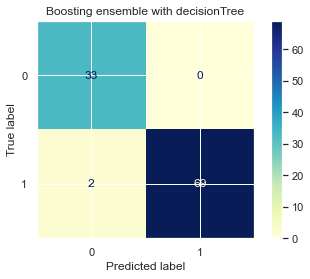

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



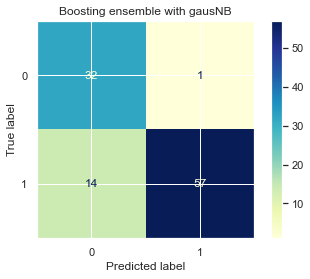

              precision    recall  f1-score   support

           0       0.70      0.97      0.81        33
           1       0.98      0.80      0.88        71

    accuracy                           0.86       104
   macro avg       0.84      0.89      0.85       104
weighted avg       0.89      0.86      0.86       104



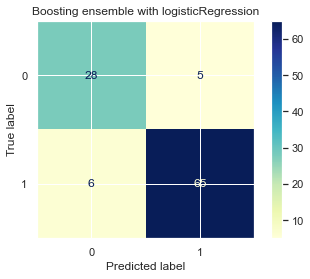

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.93      0.92      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.90      0.89      0.89       104



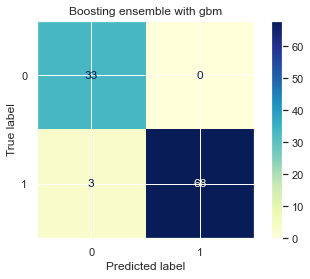

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



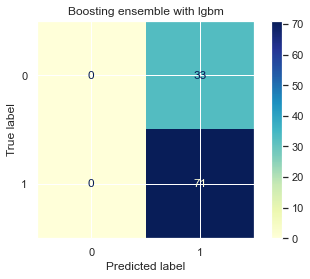

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.68      1.00      0.81        71

    accuracy                           0.68       104
   macro avg       0.34      0.50      0.41       104
weighted avg       0.47      0.68      0.55       104



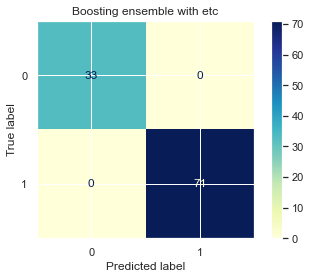

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        71

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



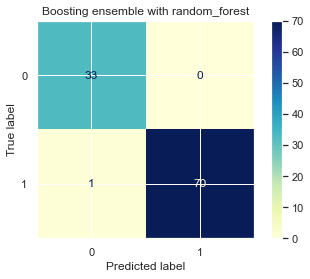

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



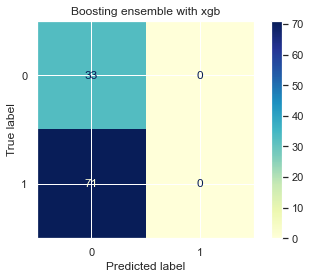

              precision    recall  f1-score   support

           0       0.32      1.00      0.48        33
           1       0.00      0.00      0.00        71

    accuracy                           0.32       104
   macro avg       0.16      0.50      0.24       104
weighted avg       0.10      0.32      0.15       104



In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
rocs = []
import seaborn as sn
for name, model in ensemble_boosting_models:
    y_pred = model.predict(X_test)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot(cmap=plt.cm.YlGnBu,)
    plt.title('Boosting ensemble with '+ name)
    plt.show()
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    rocs.append(["Boosting Ensemble "+ " " + name ,auc,false_positive_rate,true_positive_rate])




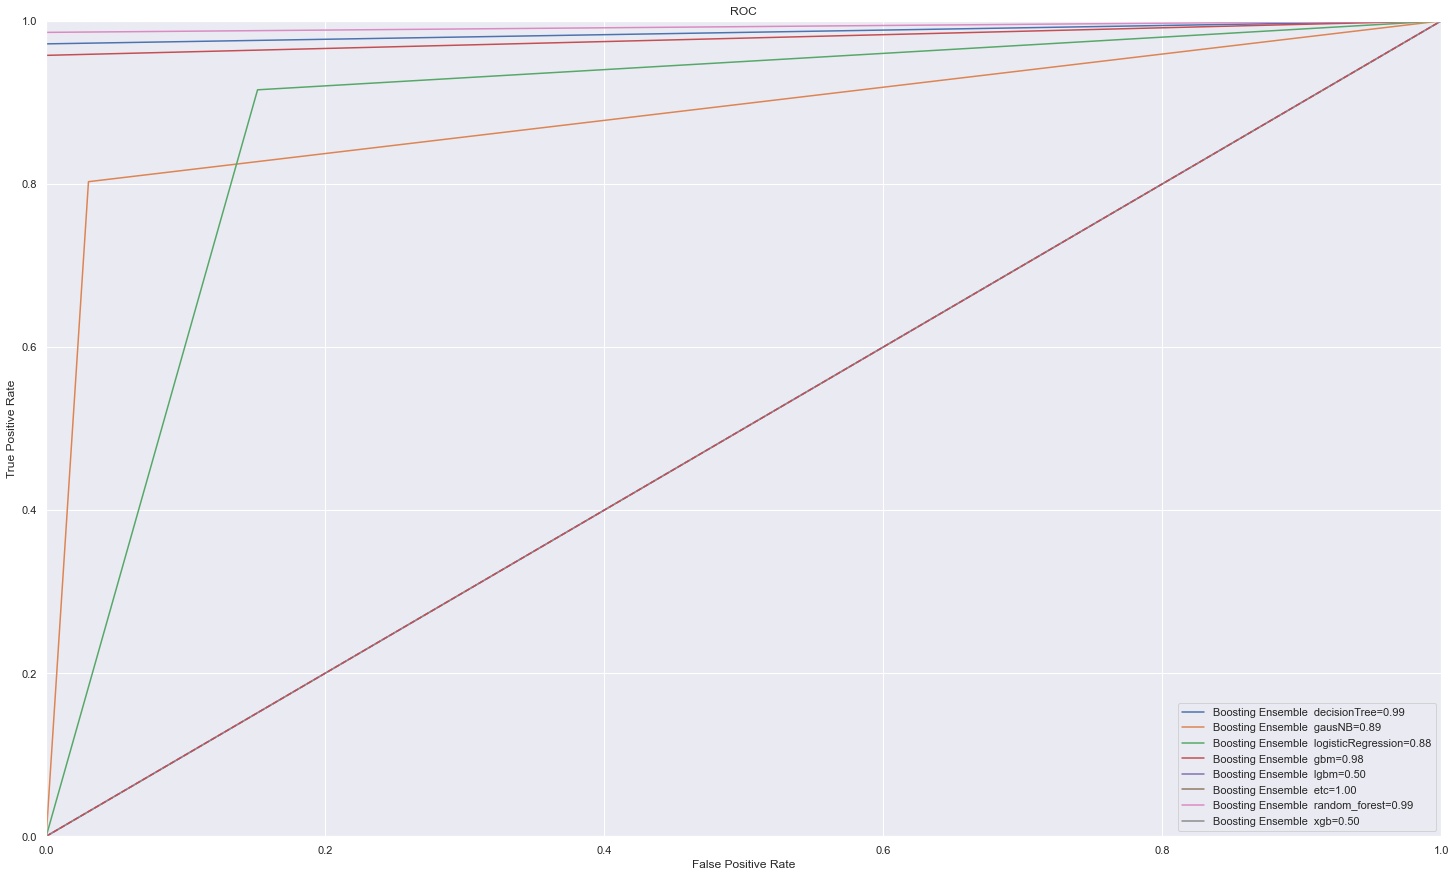

In [ ]:
plt.figure(figsize=(25, 15))
plt.title('ROC')
for i in range(len(rocs)):
    plt.plot(rocs[i][2], rocs[i][3], label= rocs[i][0]+'=%0.2f' %rocs[i][1])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
results_df

,Model,Accuarcy score,f1-score-macro,f1-score-micro,f1-score-weighted,recall,precision,Fit Time,Mean Fit Time,Test Time
0,decisionTree,0.980769,0.978151,0.980769,0.980915,0.971831,1.000000,1.686302e+09,4.053609e+06,1.686302e+09
1,gausNB,0.855769,0.846924,0.855769,0.860369,0.802817,0.982759,1.686302e+09,4.053609e+06,1.686302e+09
2,logisticRegression,0.894231,0.878903,0.894231,0.894645,0.915493,0.928571,1.686302e+09,4.053609e+06,1.686302e+09
3,gbm,0.971154,0.967470,0.971154,0.971470,0.957746,1.000000,1.686302e+09,4.053609e+06,1.686302e+09
4,lgbm,0.682692,0.405714,0.682692,0.553956,1.000000,0.682692,1.686302e+09,4.053609e+06,1.686302e+09
5,etc,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.686302e+09,4.053609e+06,1.686302e+09
6,random_forest,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686302e+09,4.053609e+06,1.686302e+09
7,xgb,0.317308,0.240876,0.317308,0.152864,0.000000,0.000000,1.686302e+09,4.053609e+06,1.686302e+09


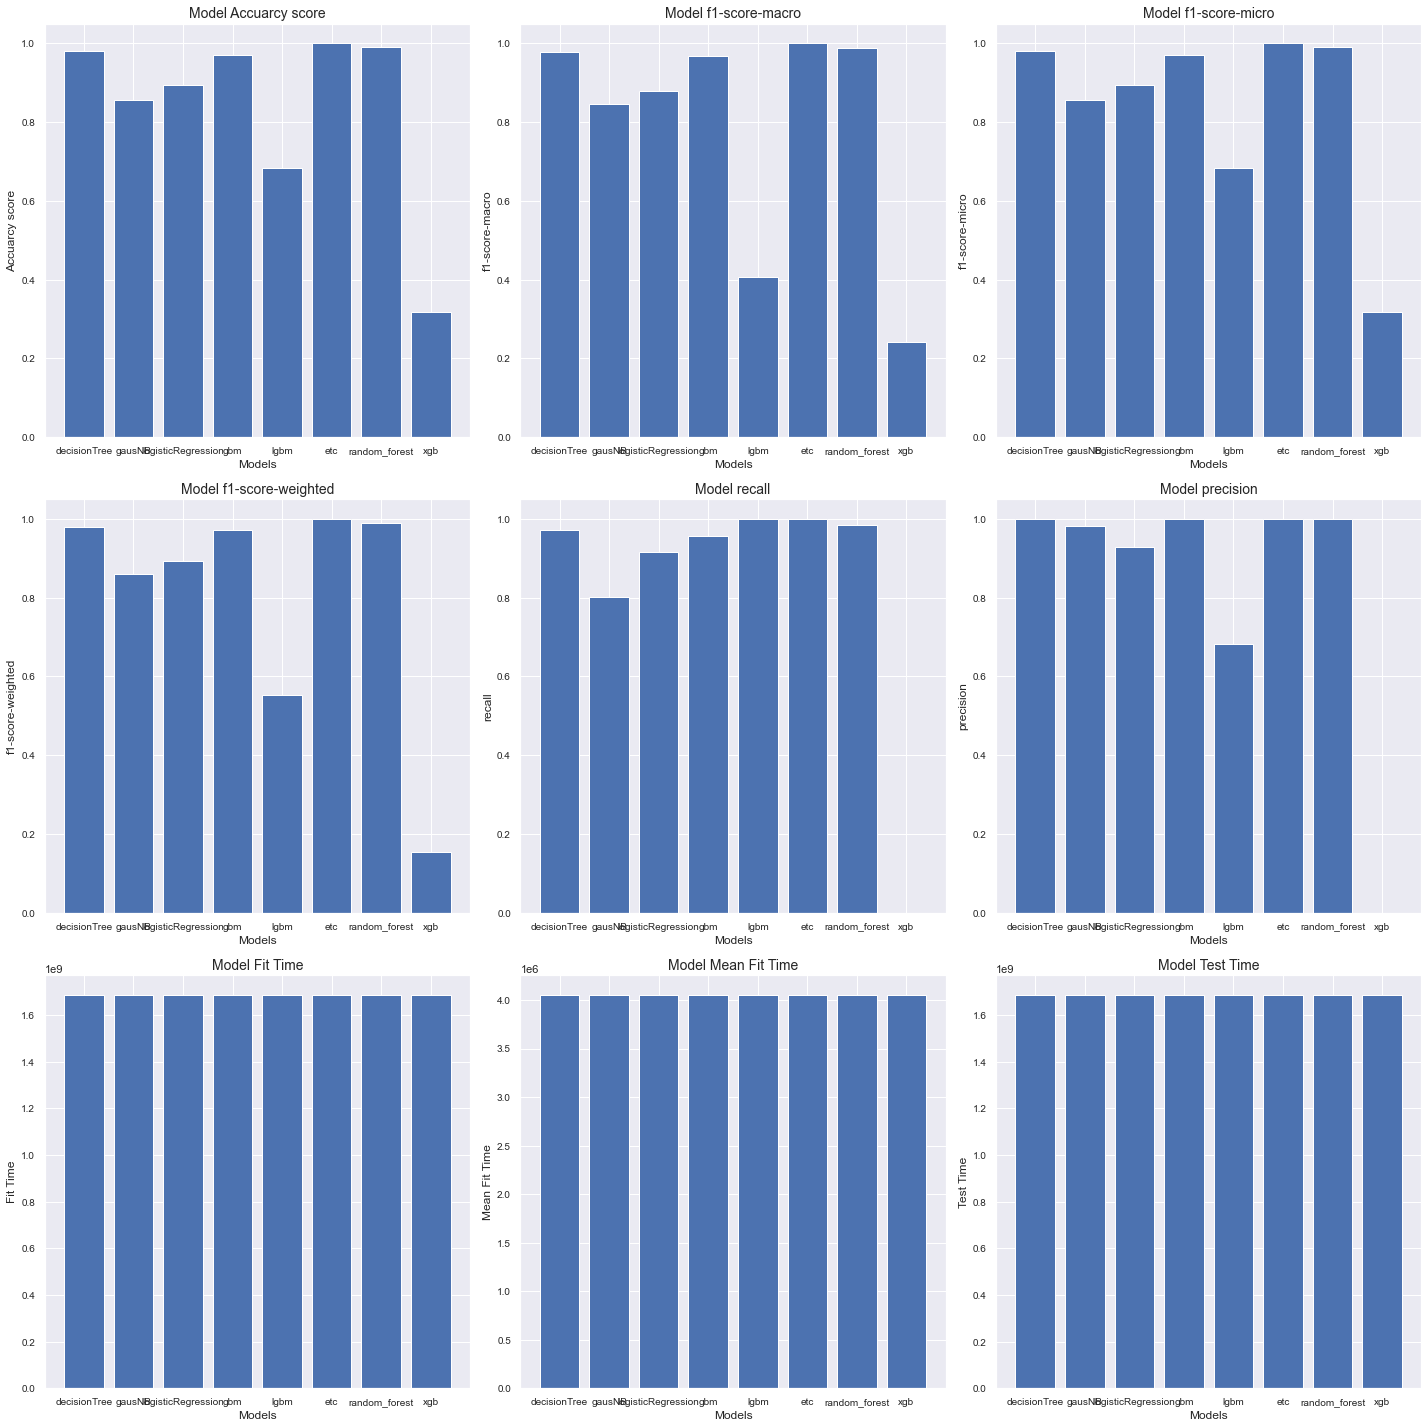

In [ ]:
# Plot the results
fig, axs = plt.subplots(3,3, figsize=(20, 20))
metrics = ['Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision', 'Fit Time', 'Mean Fit Time', 'Test Time']
model_names = results_df['Model'].tolist()

for i, ax in enumerate(axs.flat):
    metric = metrics[i]
    metric_values = results_df[metric].tolist()
    ax.bar(model_names, metric_values)
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f'Model {metric}', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig("model_ada_boosting_metrics.png")
plt.show()

In [ ]:
# Train the  Bagging Ensemble
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
cv = KFold(n_splits=5, shuffle=True, random_state=42)
ensemble_bagging_models = []

for name, model in models:
    try:
        if isinstance(model, ExtraTreesClassifier):
            model.set_params(n_estimators=int(model.get_params()['n_estimators']),
                            max_depth = int(model.get_params()['max_depth'])
                            )
        if isinstance(model, RandomForestClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']))

        if isinstance(model, GradientBoostingClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             learning_rate=(model.get_params()['learning_rate']))



        if isinstance(model, lgb.LGBMClassifier):
            model.set_params(colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             min_split_gain=(model.get_params()['min_split_gain']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )
        if isinstance(model, XGBClassifier):
            model.set_params(learning_rate=(model.get_params()['learning_rate']),
                             colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )

        if isinstance(model, DecisionTreeClassifier):
            model.set_params(ccp_alpha=(model.get_params()['ccp_alpha']),
                             max_depth=int(model.get_params()['max_depth'])
                            )

        if isinstance(model, GaussianNB):
            model.set_params(var_smoothing=(model.get_params()['var_smoothing'])
                            )

        if isinstance(model, SVC):
            model.set_params(C=(model.get_params()['C']),
                             gamma=(model.get_params()['gamma'])
                            )

        if isinstance(model, LogisticRegression):
            model.set_params(C=(model.get_params()['C'])
                            )

        if isinstance(model, MLPClassifier):
            model.set_params(alpha=(model.get_params()['alpha']),
                             max_iter=(model.get_params()['max_iter'])
                            )



        print(model)
        bagging_ensemble = BaggingClassifier(base_estimator=model, n_estimators=50, random_state=42)
        bagging_ensemble.fit(X_train, y_train)
        ensemble_bagging_models.append((name, bagging_ensemble))
    except Exception as e:
        print('hata /n',e)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7)
GaussianNB(var_smoothing=1e-10)
SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')
LogisticRegression(C=231.34818551397362)
GradientBoostingClassifier(learning_rate=0.6139225781915966, n_estimators=69,
                           random_state=42)
MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')
LGBMClassifier(colsample_bytree=0.8163918277196188, max_depth=15,
               min_split_gain=0.1472549856113242, n_estimators=87,
               reg_alpha=1.0835851529291876, reg_lambda=1.2037398089039828,
               subsample=0.387064086940639)
ExtraTreesClassifier(max_depth=2455, n_estimators=47, random_state=42)
RandomForestClassifier(max_depth=9530, n_estimators=22, random_state=42)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8947165815903877,
              enable_categorical=False, gamma=None, gpu_id=None,
     

[13:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
# Save the results to an Excel file
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
results = []

for name, model in ensemble_bagging_models:

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test,y_pred ,average='macro')
    f1_mikro = f1_score(y_test,y_pred ,average='micro')
    f1_weighted = f1_score(y_test,y_pred ,average='weighted')
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    fit_time = time()
    mean_fit_time = fit_time / len(X_train)
    test_time = time()
    results.append([name, score, f1_macro, f1_mikro,f1_weighted,recall, precision,fit_time, mean_fit_time, test_time])

results_df = pd.DataFrame(results, columns=['Model','Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision','Fit Time', 'Mean Fit Time', 'Test Time'])
results_df.to_excel('model_bagging_results.xlsx', index=False)

In [ ]:
results_df

,Model,Accuarcy score,f1-score-macro,f1-score-micro,f1-score-weighted,recall,precision,Fit Time,Mean Fit Time,Test Time
0,decisionTree,0.980769,0.978151,0.980769,0.980915,0.971831,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
1,gausNB,0.913462,0.899301,0.913462,0.913098,0.943662,0.930556,1.686307e+09,4.053623e+06,1.686307e+09
2,svc,0.923077,0.909722,0.923077,0.922409,0.957746,0.931507,1.686307e+09,4.053623e+06,1.686307e+09
3,logisticRegression,0.923077,0.909722,0.923077,0.922409,0.957746,0.931507,1.686307e+09,4.053623e+06,1.686307e+09
4,gbm,0.980769,0.978151,0.980769,0.980915,0.971831,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
5,mlp,0.951923,0.944056,0.951923,0.951721,0.971831,0.958333,1.686307e+09,4.053623e+06,1.686307e+09
6,lgbm,0.961538,0.954043,0.961538,0.960825,1.000000,0.946667,1.686307e+09,4.053623e+06,1.686307e+09
7,etc,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
8,random_forest,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
9,xgb,0.971154,0.966434,0.971154,0.971033,0.985915,0.972222,1.686307e+09,4.053623e+06,1.686307e+09


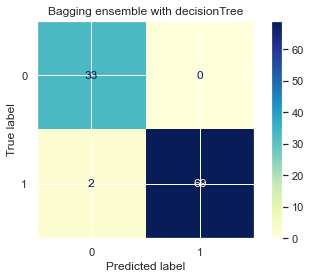

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



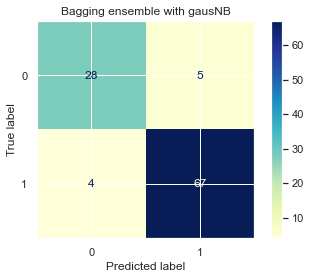

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



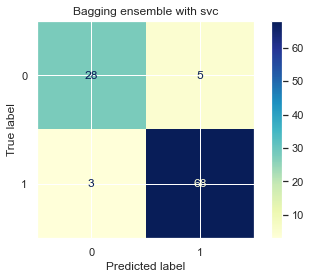

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



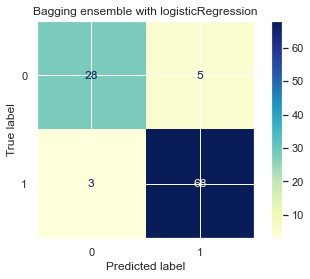

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



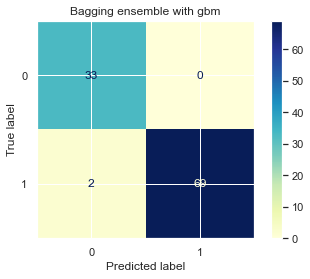

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



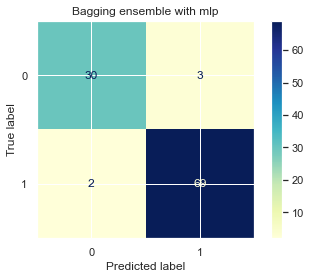

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        33
           1       0.96      0.97      0.97        71

    accuracy                           0.95       104
   macro avg       0.95      0.94      0.94       104
weighted avg       0.95      0.95      0.95       104



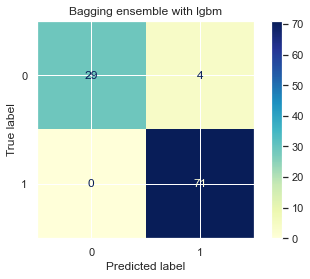

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.95      1.00      0.97        71

    accuracy                           0.96       104
   macro avg       0.97      0.94      0.95       104
weighted avg       0.96      0.96      0.96       104



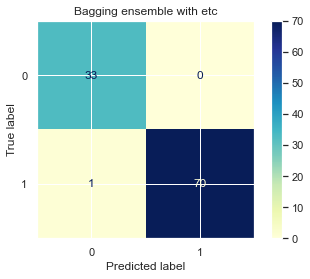

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



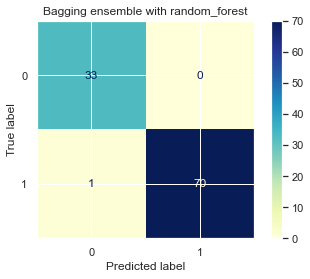

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



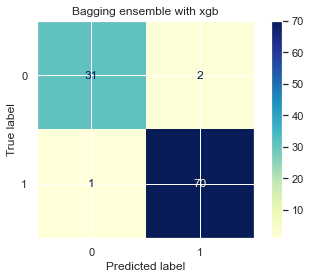

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.97      0.99      0.98        71

    accuracy                           0.97       104
   macro avg       0.97      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104



In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

import seaborn as sn
rocs = []
for name, model in ensemble_bagging_models:
    y_pred = model.predict(X_test)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot(cmap=plt.cm.YlGnBu,)
    plt.title('Bagging ensemble with '+ name)
    plt.show()
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    rocs.append(["Bagging Ensemble "+ " " + name ,auc,false_positive_rate,true_positive_rate])

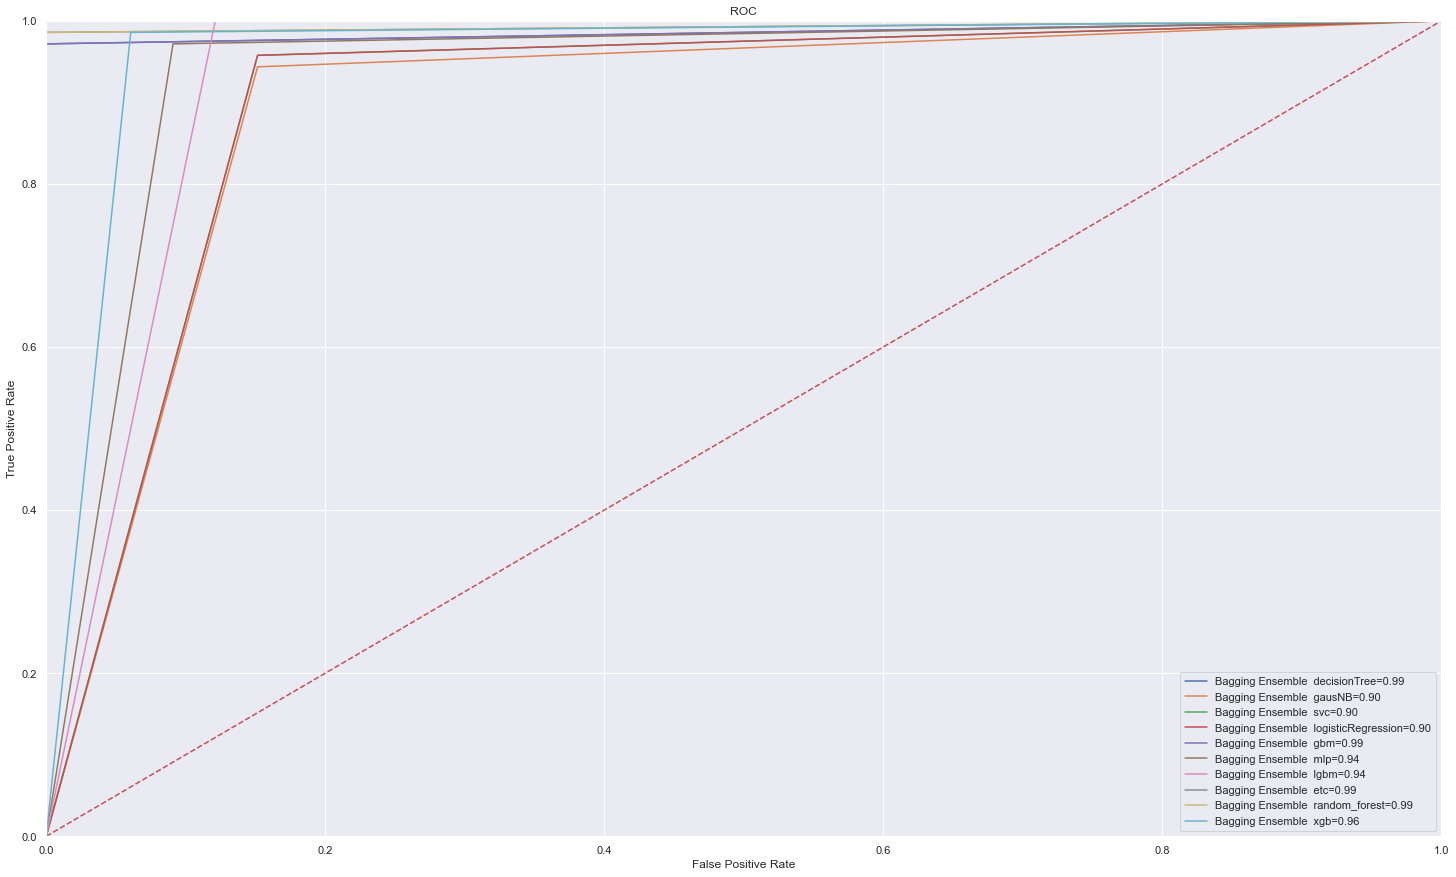

In [ ]:
plt.figure(figsize=(25, 15))
plt.title('ROC')
for i in range(len(rocs)):
    plt.plot(rocs[i][2], rocs[i][3], label= rocs[i][0]+'=%0.2f' %rocs[i][1])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

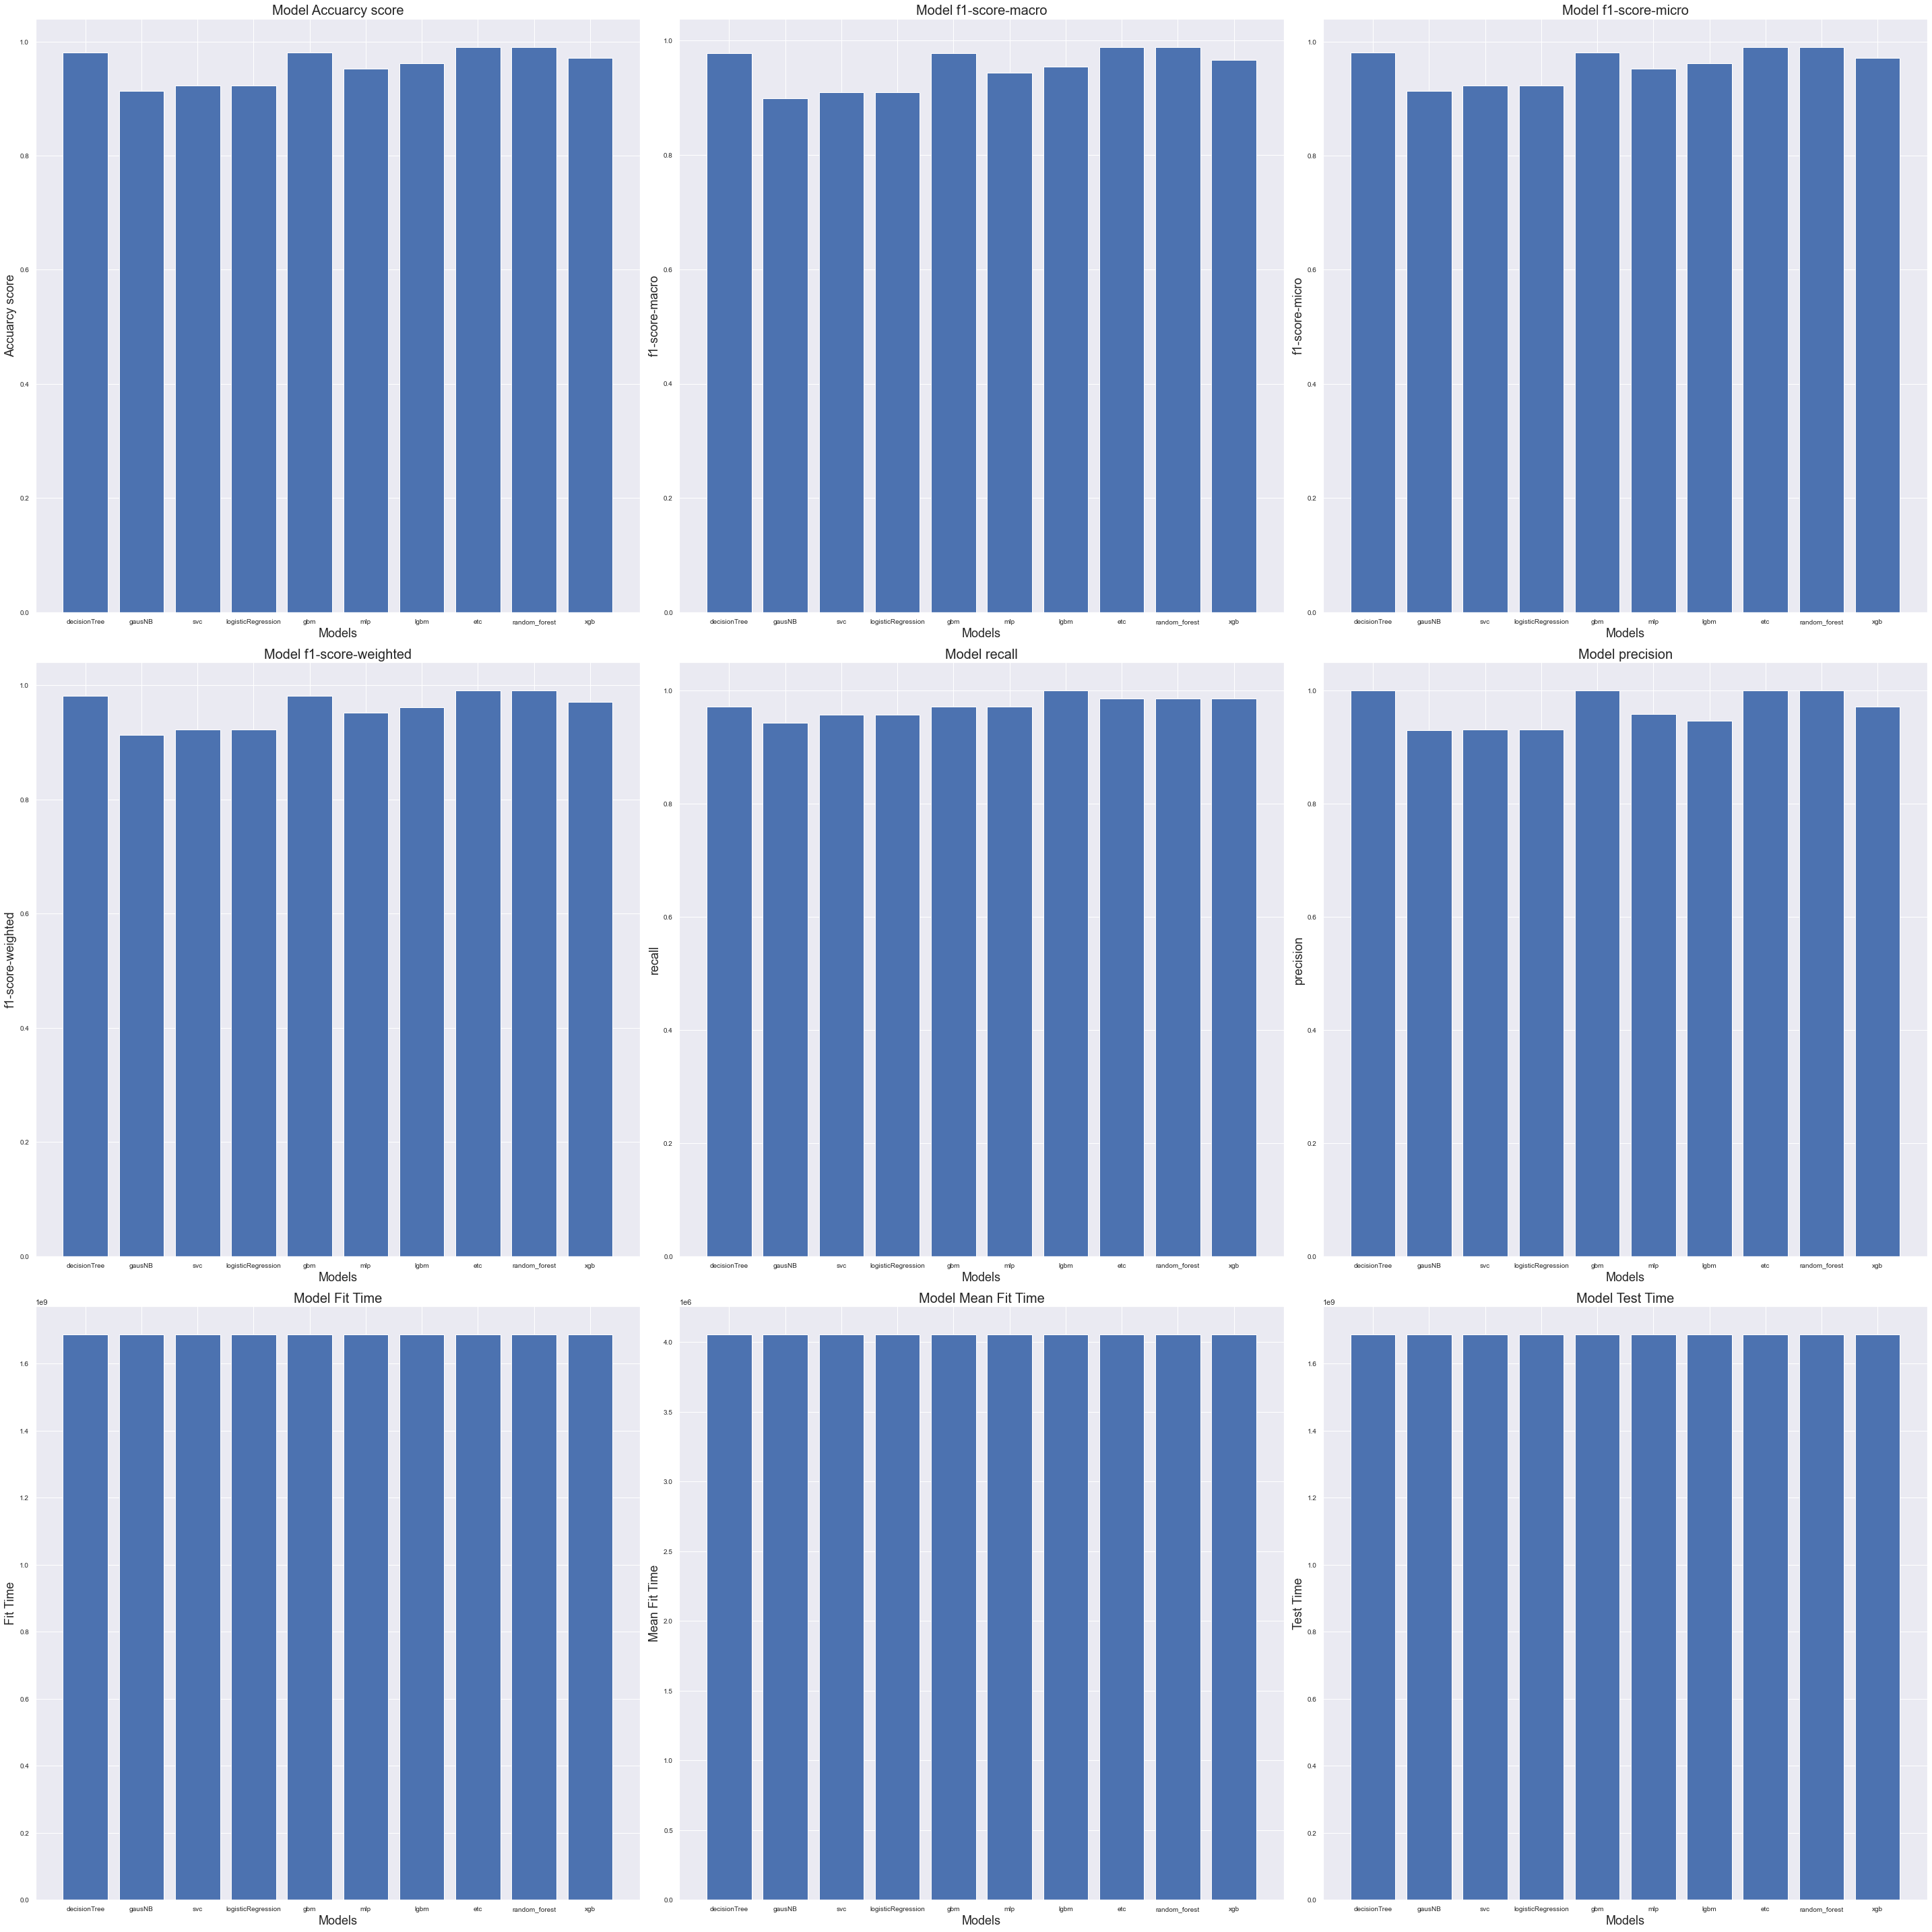

In [ ]:
# Plot the results
fig, axs = plt.subplots(3,3, figsize=(40, 40))
metrics = ['Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision', 'Fit Time', 'Mean Fit Time', 'Test Time']
model_names = results_df['Model'].tolist()

for i, ax in enumerate(axs.flat):
    metric = metrics[i]
    metric_values = results_df[metric].tolist()
    ax.bar(model_names, metric_values)
    ax.set_xlabel('Models', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.set_title(f'Model {metric}', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig("model_bagging_metrics.png")
plt.show()

In [ ]:
# Train the  Super Learner model,
import warnings
warnings.filterwarnings("ignore")

from mlens.ensemble import SuperLearner
cv = KFold(n_splits=5, shuffle=True, random_state=42)
ensemble_superLearner_models = []

for name, model in models:
    try:
        if isinstance(model, ExtraTreesClassifier):
            model.set_params(n_estimators=int(model.get_params()['n_estimators']),
                            max_depth = int(model.get_params()['max_depth'])
                            )
        if isinstance(model, RandomForestClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']))

        if isinstance(model, GradientBoostingClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             learning_rate=(model.get_params()['learning_rate']))



        if isinstance(model, lgb.LGBMClassifier):
            model.set_params(colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             min_split_gain=(model.get_params()['min_split_gain']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )
        if isinstance(model, XGBClassifier):
            model.set_params(learning_rate=(model.get_params()['learning_rate']),
                             colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )

        if isinstance(model, DecisionTreeClassifier):
            model.set_params(ccp_alpha=(model.get_params()['ccp_alpha']),
                             max_depth=int(model.get_params()['max_depth'])
                            )

        if isinstance(model, GaussianNB):
            model.set_params(var_smoothing=(model.get_params()['var_smoothing'])
                            )

        if isinstance(model, SVC):
            model.set_params(C=(model.get_params()['C']),
                             gamma=(model.get_params()['gamma'])
                            )

        if isinstance(model, LogisticRegression):
            model.set_params(C=(model.get_params()['C'])
                            )

        if isinstance(model, MLPClassifier):
            model.set_params(alpha=(model.get_params()['alpha']),
                             max_iter=(model.get_params()['max_iter'])
                            )




        print(model)
        try:
            superlearner = SuperLearner()
            superlearner.add(model)

            superlearner.fit(X_train, y_train)
            ensemble_superLearner_models.append((name, superlearner))
        except:
            print('hata')
    except Exception as e:
        print('hata /n',e)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7)
GaussianNB(var_smoothing=1e-10)
SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')
LogisticRegression(C=231.34818551397362)
GradientBoostingClassifier(learning_rate=0.6139225781915966, n_estimators=69,
                           random_state=42)
MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')
LGBMClassifier(colsample_bytree=0.8163918277196188, max_depth=15,
               min_split_gain=0.1472549856113242, n_estimators=87,
               reg_alpha=1.0835851529291876, reg_lambda=1.2037398089039828,
               subsample=0.387064086940639)
ExtraTreesClassifier(max_depth=2455, n_estimators=47, random_state=42)
RandomForestClassifier(max_depth=9530, n_estimators=22, random_state=42)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8947165815903877,
              enable_categorical=False, gamma=None, gpu_id=None,
     

In [ ]:
# Save the results to an Excel file
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
results = []

for name, model in ensemble_superLearner_models:

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test,y_pred ,average='macro')
    f1_mikro = f1_score(y_test,y_pred ,average='micro')
    f1_weighted = f1_score(y_test,y_pred ,average='weighted')
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    fit_time = time()
    mean_fit_time = fit_time / len(X_train)
    test_time = time()
    results.append([name, score, f1_macro, f1_mikro,f1_weighted,recall, precision,fit_time, mean_fit_time, test_time])

results_df = pd.DataFrame(results, columns=['Model','Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision','Fit Time', 'Mean Fit Time', 'Test Time'])
results_df.to_excel('model_superLearner_results.xlsx', index=False)

In [ ]:
results_df

,Model,Accuarcy score,f1-score-macro,f1-score-micro,f1-score-weighted,recall,precision,Fit Time,Mean Fit Time,Test Time
0,decisionTree,0.961538,0.956936,0.961538,0.962080,0.943662,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
1,gausNB,0.913462,0.899301,0.913462,0.913098,0.943662,0.930556,1.686307e+09,4.053623e+06,1.686307e+09
2,svc,0.894231,0.878903,0.894231,0.894645,0.915493,0.928571,1.686307e+09,4.053623e+06,1.686307e+09
3,logisticRegression,0.923077,0.909722,0.923077,0.922409,0.957746,0.931507,1.686307e+09,4.053623e+06,1.686307e+09
4,gbm,0.971154,0.967470,0.971154,0.971470,0.957746,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
5,mlp,0.932692,0.922938,0.932692,0.932956,0.943662,0.957143,1.686307e+09,4.053623e+06,1.686307e+09
6,lgbm,0.932692,0.920307,0.932692,0.931786,0.971831,0.932432,1.686307e+09,4.053623e+06,1.686307e+09
7,etc,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
8,random_forest,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
9,xgb,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686307e+09,4.053623e+06,1.686307e+09


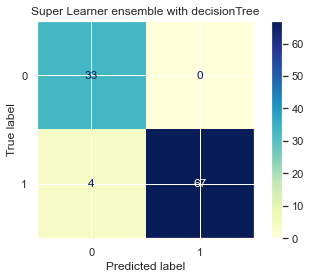

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.94      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.97      0.96       104
weighted avg       0.97      0.96      0.96       104



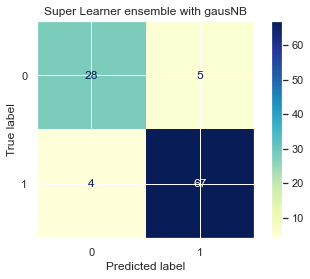

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



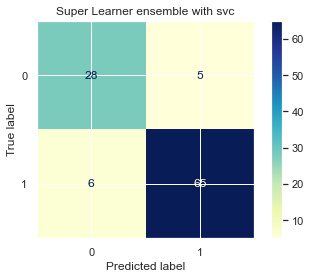

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.93      0.92      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.90      0.89      0.89       104



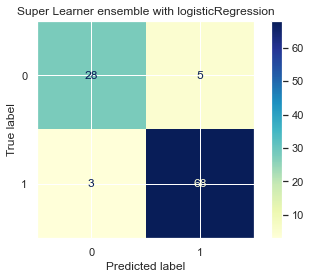

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



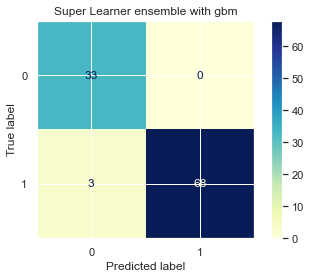

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



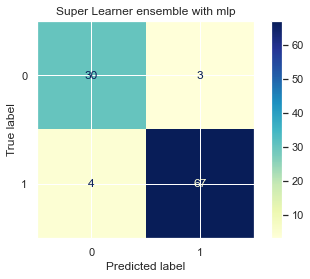

              precision    recall  f1-score   support

           0       0.88      0.91      0.90        33
           1       0.96      0.94      0.95        71

    accuracy                           0.93       104
   macro avg       0.92      0.93      0.92       104
weighted avg       0.93      0.93      0.93       104



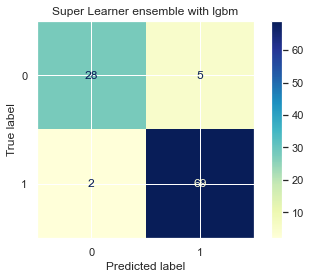

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.93      0.97      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.91      0.92       104
weighted avg       0.93      0.93      0.93       104



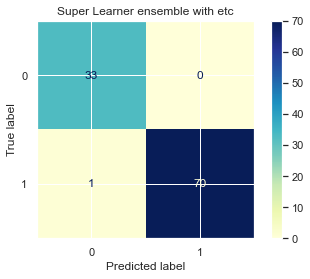

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



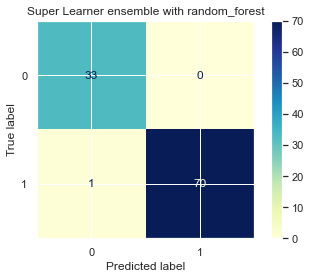

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



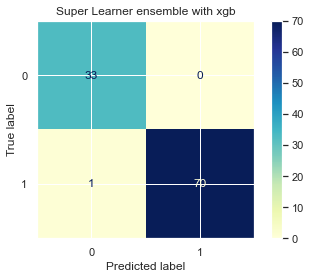

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
rocs = []
import seaborn as sn
for name, model in ensemble_superLearner_models:
    y_pred = model.predict(X_test)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot(cmap=plt.cm.YlGnBu,)
    plt.title('Super Learner ensemble with '+ name)
    plt.show()
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    rocs.append(["Super Learner Ensemble "+ " " + name ,auc,false_positive_rate,true_positive_rate])


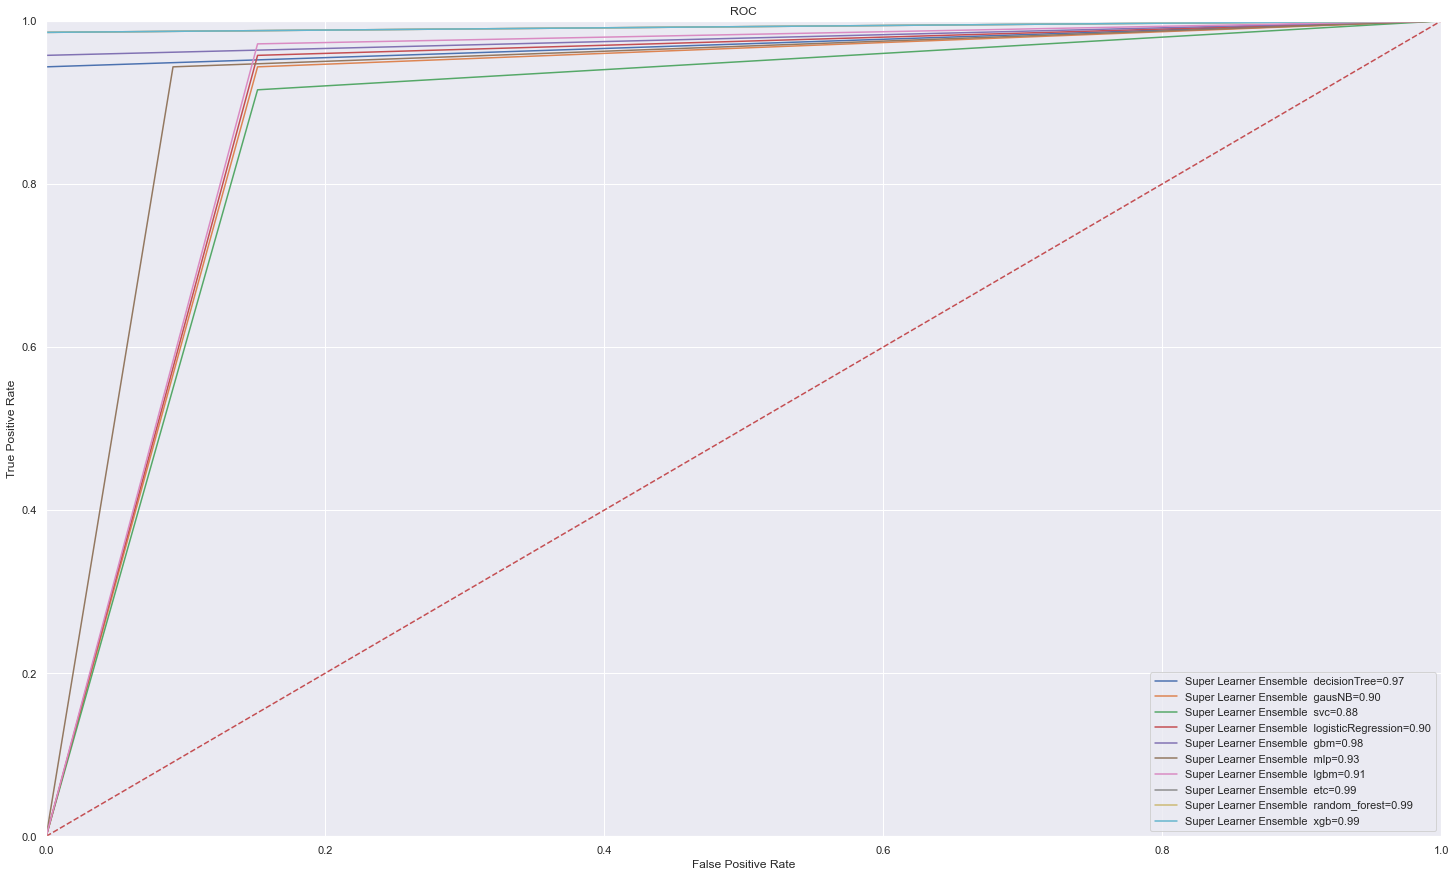

In [ ]:
plt.figure(figsize=(25, 15))
plt.title('ROC')
for i in range(len(rocs)):
    plt.plot(rocs[i][2], rocs[i][3], label= rocs[i][0]+'=%0.2f' %rocs[i][1])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

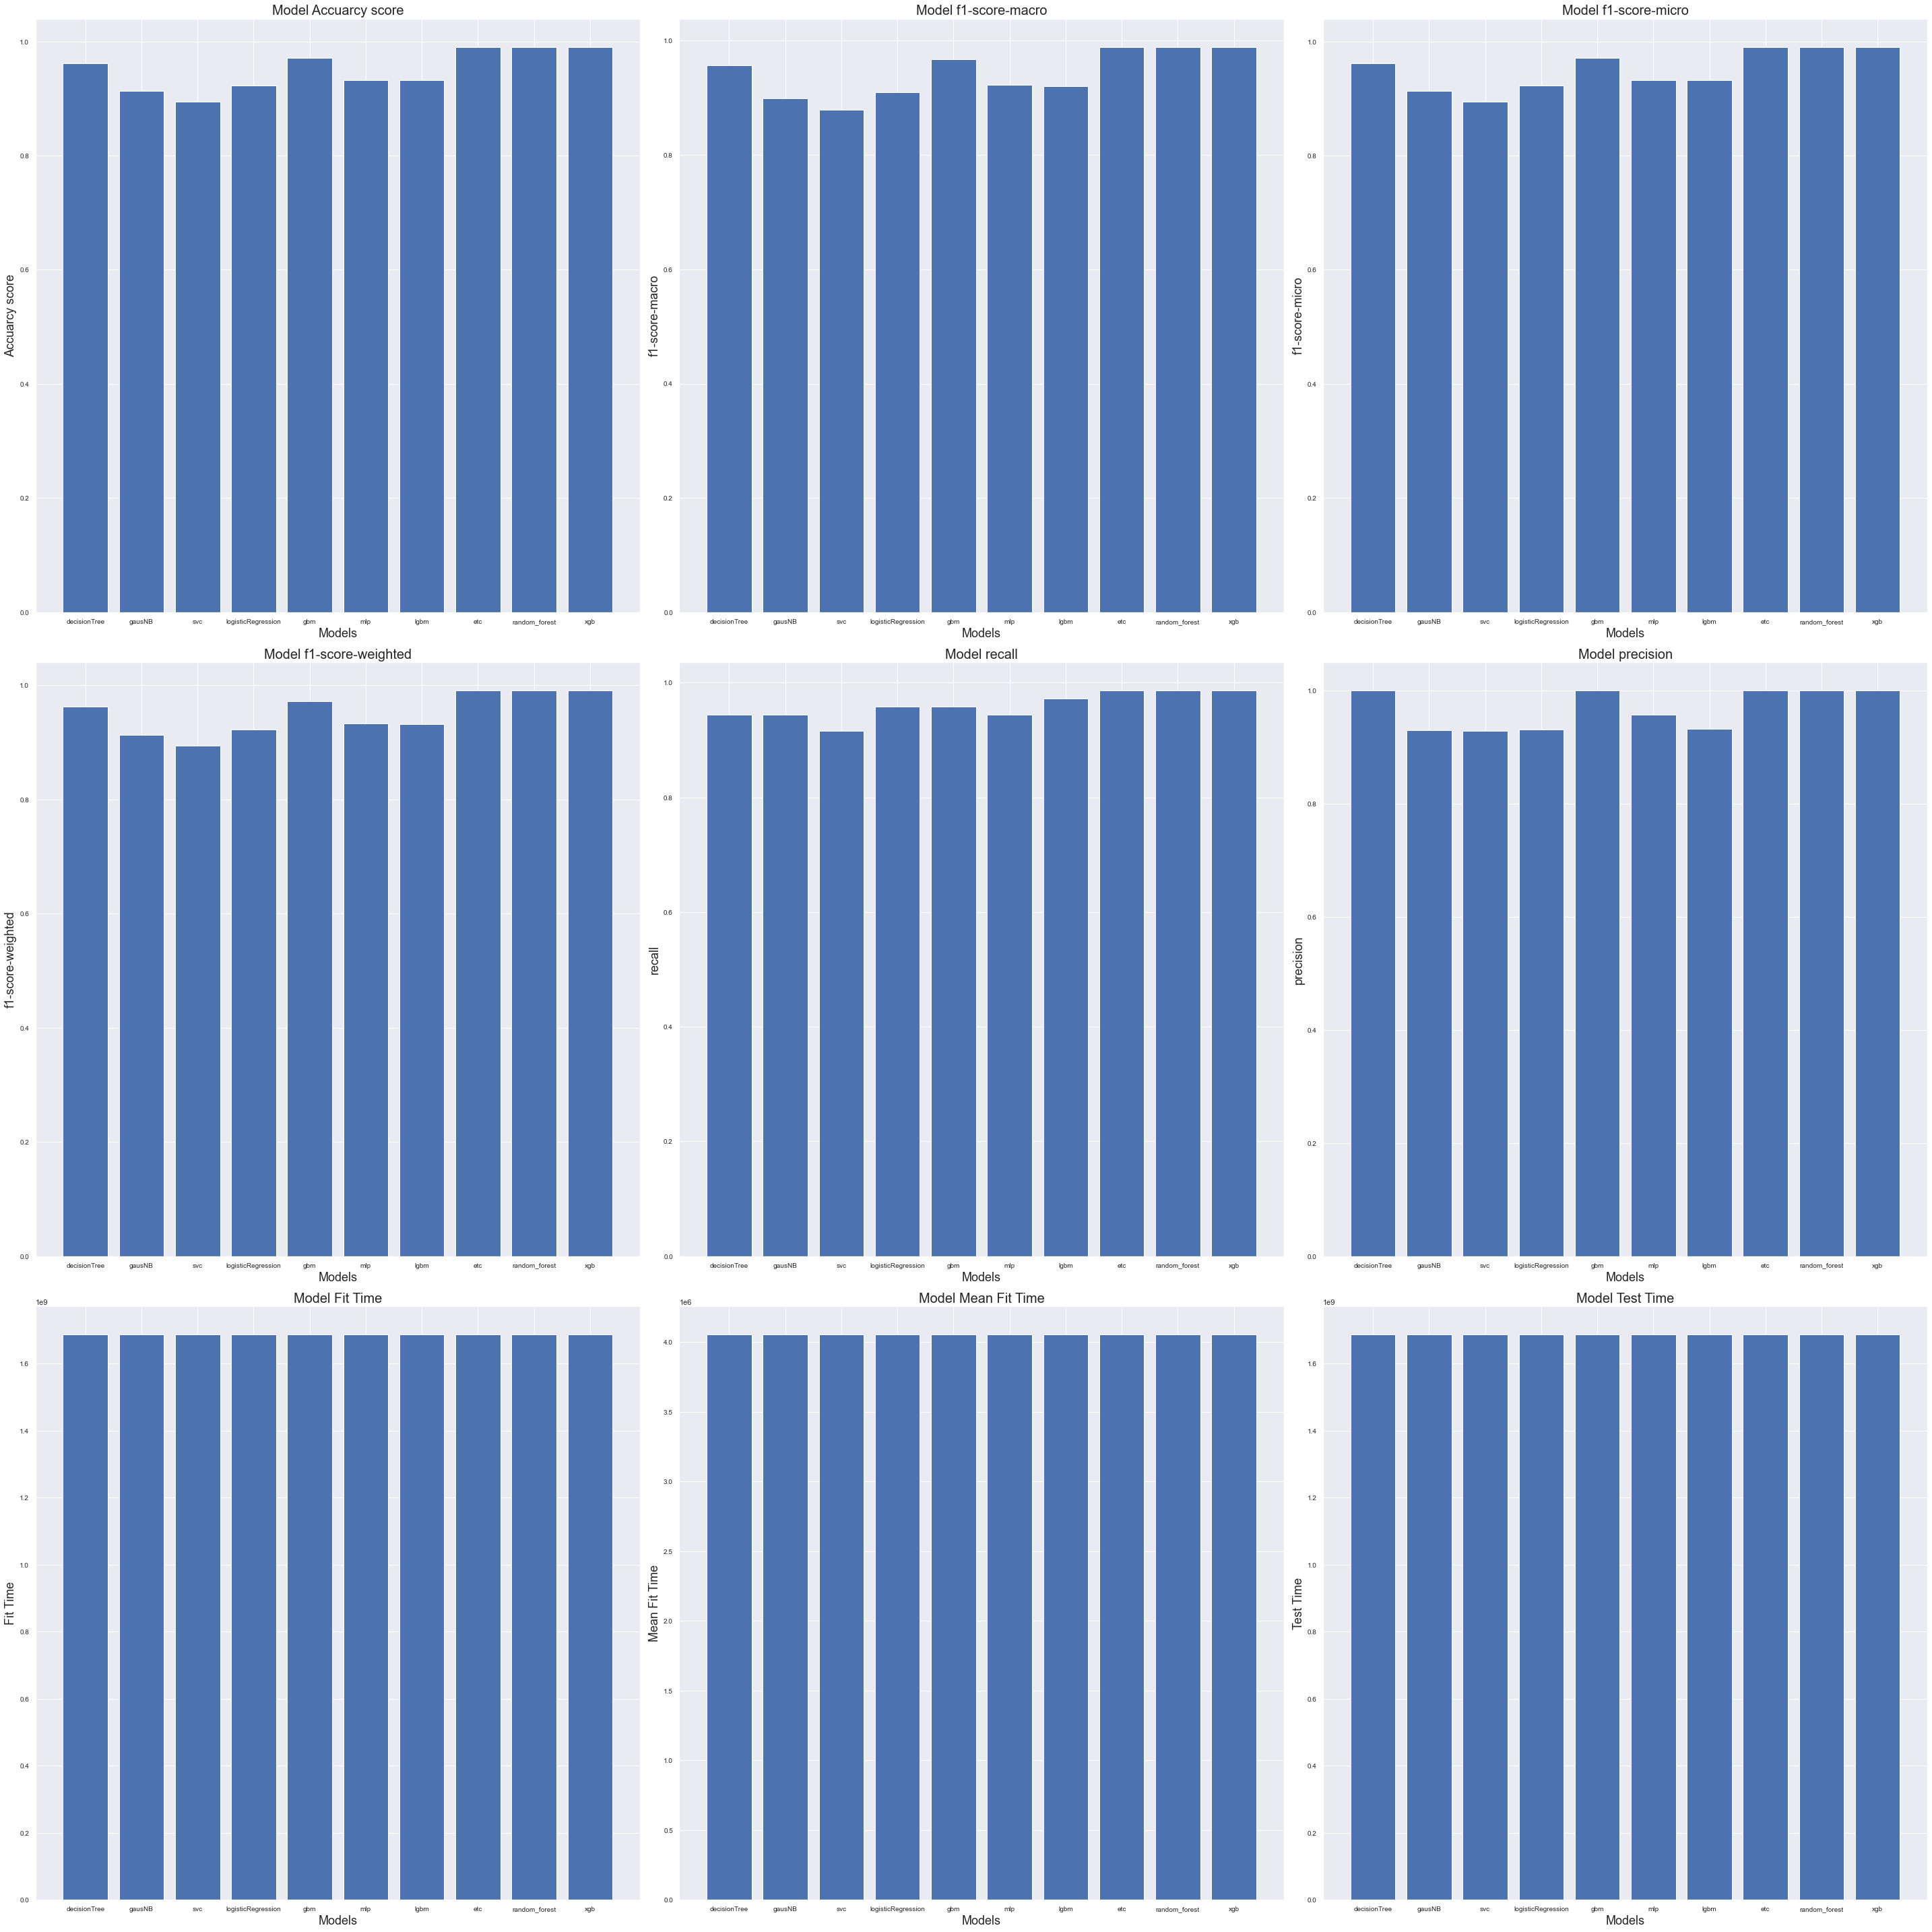

In [ ]:
# Plot the results
fig, axs = plt.subplots(3,3, figsize=(40, 40))
metrics = ['Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision', 'Fit Time', 'Mean Fit Time', 'Test Time']
model_names = results_df['Model'].tolist()

for i, ax in enumerate(axs.flat):
    metric = metrics[i]
    metric_values = results_df[metric].tolist()
    ax.bar(model_names, metric_values)
    ax.set_xlabel('Models', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.set_title(f'Model {metric}', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig("model_super_learner_metrics.png")
plt.show()

In [ ]:

# Train the  Stacking Ensemble Boosting Regression model,
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import StackingClassifier

cv = KFold(n_splits=5, shuffle=True, random_state=42)
ensemble_stacking_models = []

for name, model in models:
    try:
        if isinstance(model, ExtraTreesClassifier):
            model.set_params(n_estimators=int(model.get_params()['n_estimators']),
                            max_depth = int(model.get_params()['max_depth'])
                            )
        if isinstance(model, RandomForestClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']))

        if isinstance(model, GradientBoostingClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             learning_rate=(model.get_params()['learning_rate']))



        if isinstance(model, lgb.LGBMClassifier):
            model.set_params(colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             min_split_gain=(model.get_params()['min_split_gain']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )
        if isinstance(model, XGBClassifier):
            model.set_params(learning_rate=(model.get_params()['learning_rate']),
                             colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )

        if isinstance(model, DecisionTreeClassifier):
            model.set_params(ccp_alpha=(model.get_params()['ccp_alpha']),
                             max_depth=int(model.get_params()['max_depth'])
                            )

        if isinstance(model, GaussianNB):
            model.set_params(var_smoothing=(model.get_params()['var_smoothing'])
                            )

        if isinstance(model, SVC):
            model.set_params(C=(model.get_params()['C']),
                             gamma=(model.get_params()['gamma'])
                            )

        if isinstance(model, LogisticRegression):
            model.set_params(C=(model.get_params()['C'])
                            )

        if isinstance(model, MLPClassifier):
            model.set_params(alpha=(model.get_params()['alpha']),
                             max_iter=(model.get_params()['max_iter'])
                            )




        print(model)
        level0 = list()
        level0.append((str(model), model))
        stacking_ensemble = StackingClassifier(estimators=level0)
        stacking_ensemble.fit(X_train, y_train)
        ensemble_stacking_models.append((name, stacking_ensemble))
    except Exception as e:
        print('hata /n',e)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7)
GaussianNB(var_smoothing=1e-10)
SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')
LogisticRegression(C=231.34818551397362)
GradientBoostingClassifier(learning_rate=0.6139225781915966, n_estimators=69,
                           random_state=42)
MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')
LGBMClassifier(colsample_bytree=0.8163918277196188, max_depth=15,
               min_split_gain=0.1472549856113242, n_estimators=87,
               reg_alpha=1.0835851529291876, reg_lambda=1.2037398089039828,
               subsample=0.387064086940639)
ExtraTreesClassifier(max_depth=2455, n_estimators=47, random_state=42)
RandomForestClassifier(max_depth=9530, n_estimators=22, random_state=42)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8947165815903877,
              enable_categorical=False, gamma=None, gpu_id=None,
     

In [ ]:
# Save the results to an Excel file
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
results = []

for name, model in ensemble_stacking_models:

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test,y_pred ,average='macro')
    f1_mikro = f1_score(y_test,y_pred ,average='micro')
    f1_weighted = f1_score(y_test,y_pred ,average='weighted')
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    fit_time = time()
    mean_fit_time = fit_time / len(X_train)
    test_time = time()
    results.append([name, score, f1_macro, f1_mikro,f1_weighted,recall, precision,fit_time, mean_fit_time, test_time])

results_df = pd.DataFrame(results, columns=['Model','Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision','Fit Time', 'Mean Fit Time', 'Test Time'])
results_df.to_excel('model_stacking_ensemble_results.xlsx', index=False)

In [ ]:
results_df

,Model,Accuarcy score,f1-score-macro,f1-score-micro,f1-score-weighted,recall,precision,Fit Time,Mean Fit Time,Test Time
0,decisionTree,0.932692,0.925157,0.932692,0.933834,0.915493,0.984848,1.686307e+09,4.053623e+06,1.686307e+09
1,gausNB,0.913462,0.899301,0.913462,0.913098,0.943662,0.930556,1.686307e+09,4.053623e+06,1.686307e+09
2,svc,0.894231,0.878903,0.894231,0.894645,0.915493,0.928571,1.686307e+09,4.053623e+06,1.686307e+09
3,logisticRegression,0.932692,0.920307,0.932692,0.931786,0.971831,0.932432,1.686307e+09,4.053623e+06,1.686307e+09
4,gbm,0.971154,0.967470,0.971154,0.971470,0.957746,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
5,mlp,0.971154,0.966974,0.971154,0.971267,0.971831,0.985714,1.686307e+09,4.053623e+06,1.686307e+09
6,lgbm,0.951923,0.942010,0.951923,0.950770,1.000000,0.934211,1.686307e+09,4.053623e+06,1.686307e+09
7,etc,0.990385,0.988811,0.990385,0.990344,1.000000,0.986111,1.686307e+09,4.053623e+06,1.686307e+09
8,random_forest,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686307e+09,4.053623e+06,1.686307e+09
9,xgb,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686307e+09,4.053623e+06,1.686307e+09


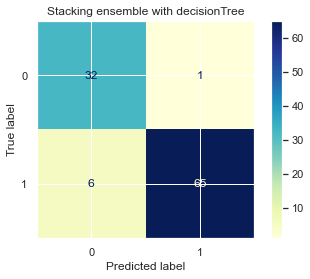

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.98      0.92      0.95        71

    accuracy                           0.93       104
   macro avg       0.91      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



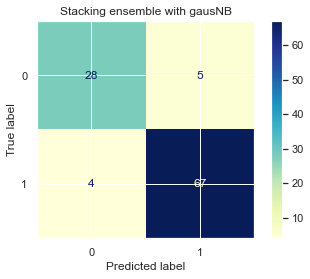

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



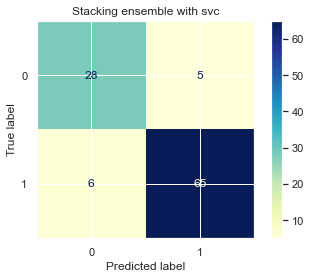

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.93      0.92      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.90      0.89      0.89       104



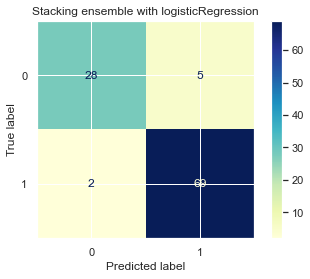

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.93      0.97      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.91      0.92       104
weighted avg       0.93      0.93      0.93       104



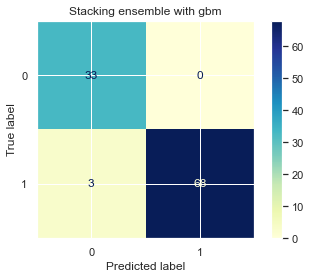

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



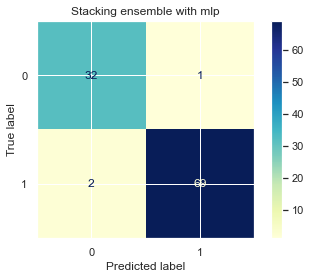

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.99      0.97      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



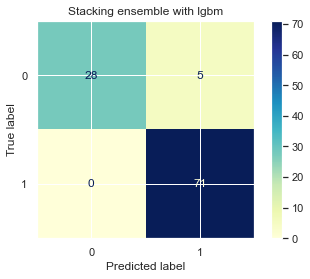

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        33
           1       0.93      1.00      0.97        71

    accuracy                           0.95       104
   macro avg       0.97      0.92      0.94       104
weighted avg       0.96      0.95      0.95       104



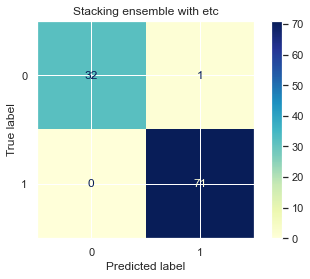

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.99      1.00      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



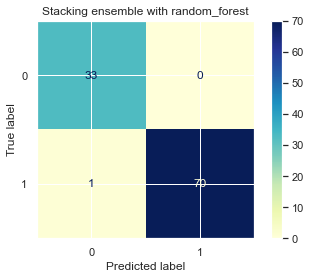

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



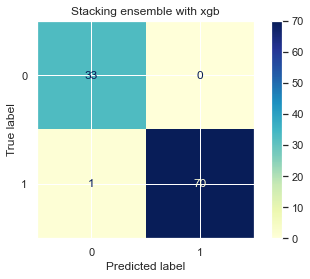

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
rocs = []
import seaborn as sn
for name, model in ensemble_stacking_models:
    y_pred = model.predict(X_test)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot(cmap=plt.cm.YlGnBu,)
    plt.title('Stacking ensemble with '+ name)
    plt.show()
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    rocs.append(["Stacking Ensemble "+ " " + name ,auc,false_positive_rate,true_positive_rate])


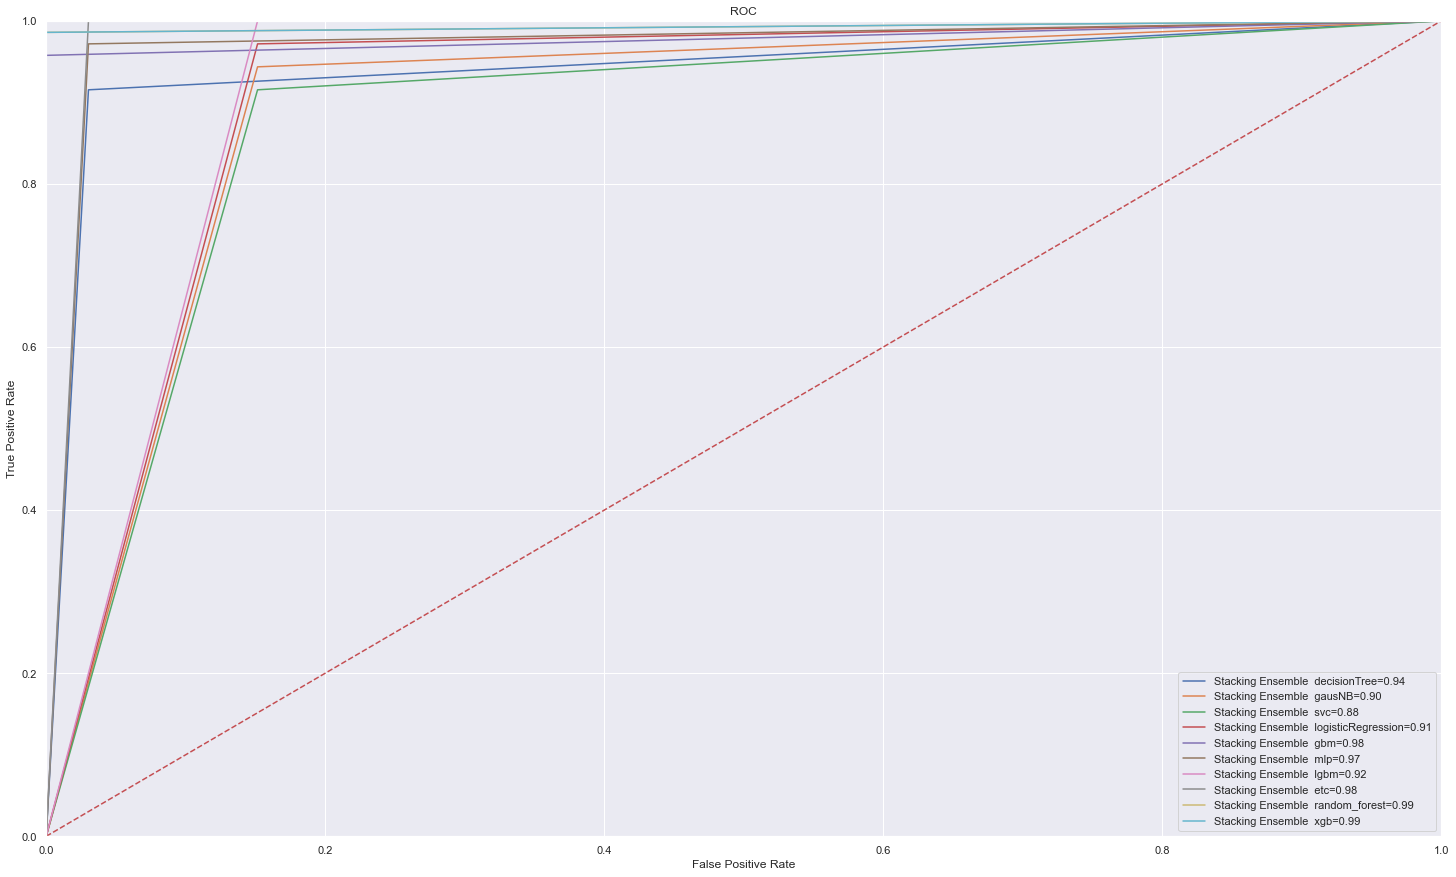

In [ ]:
plt.figure(figsize=(25, 15))
plt.title('ROC')
for i in range(len(rocs)):
    plt.plot(rocs[i][2], rocs[i][3], label= rocs[i][0]+'=%0.2f' %rocs[i][1])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

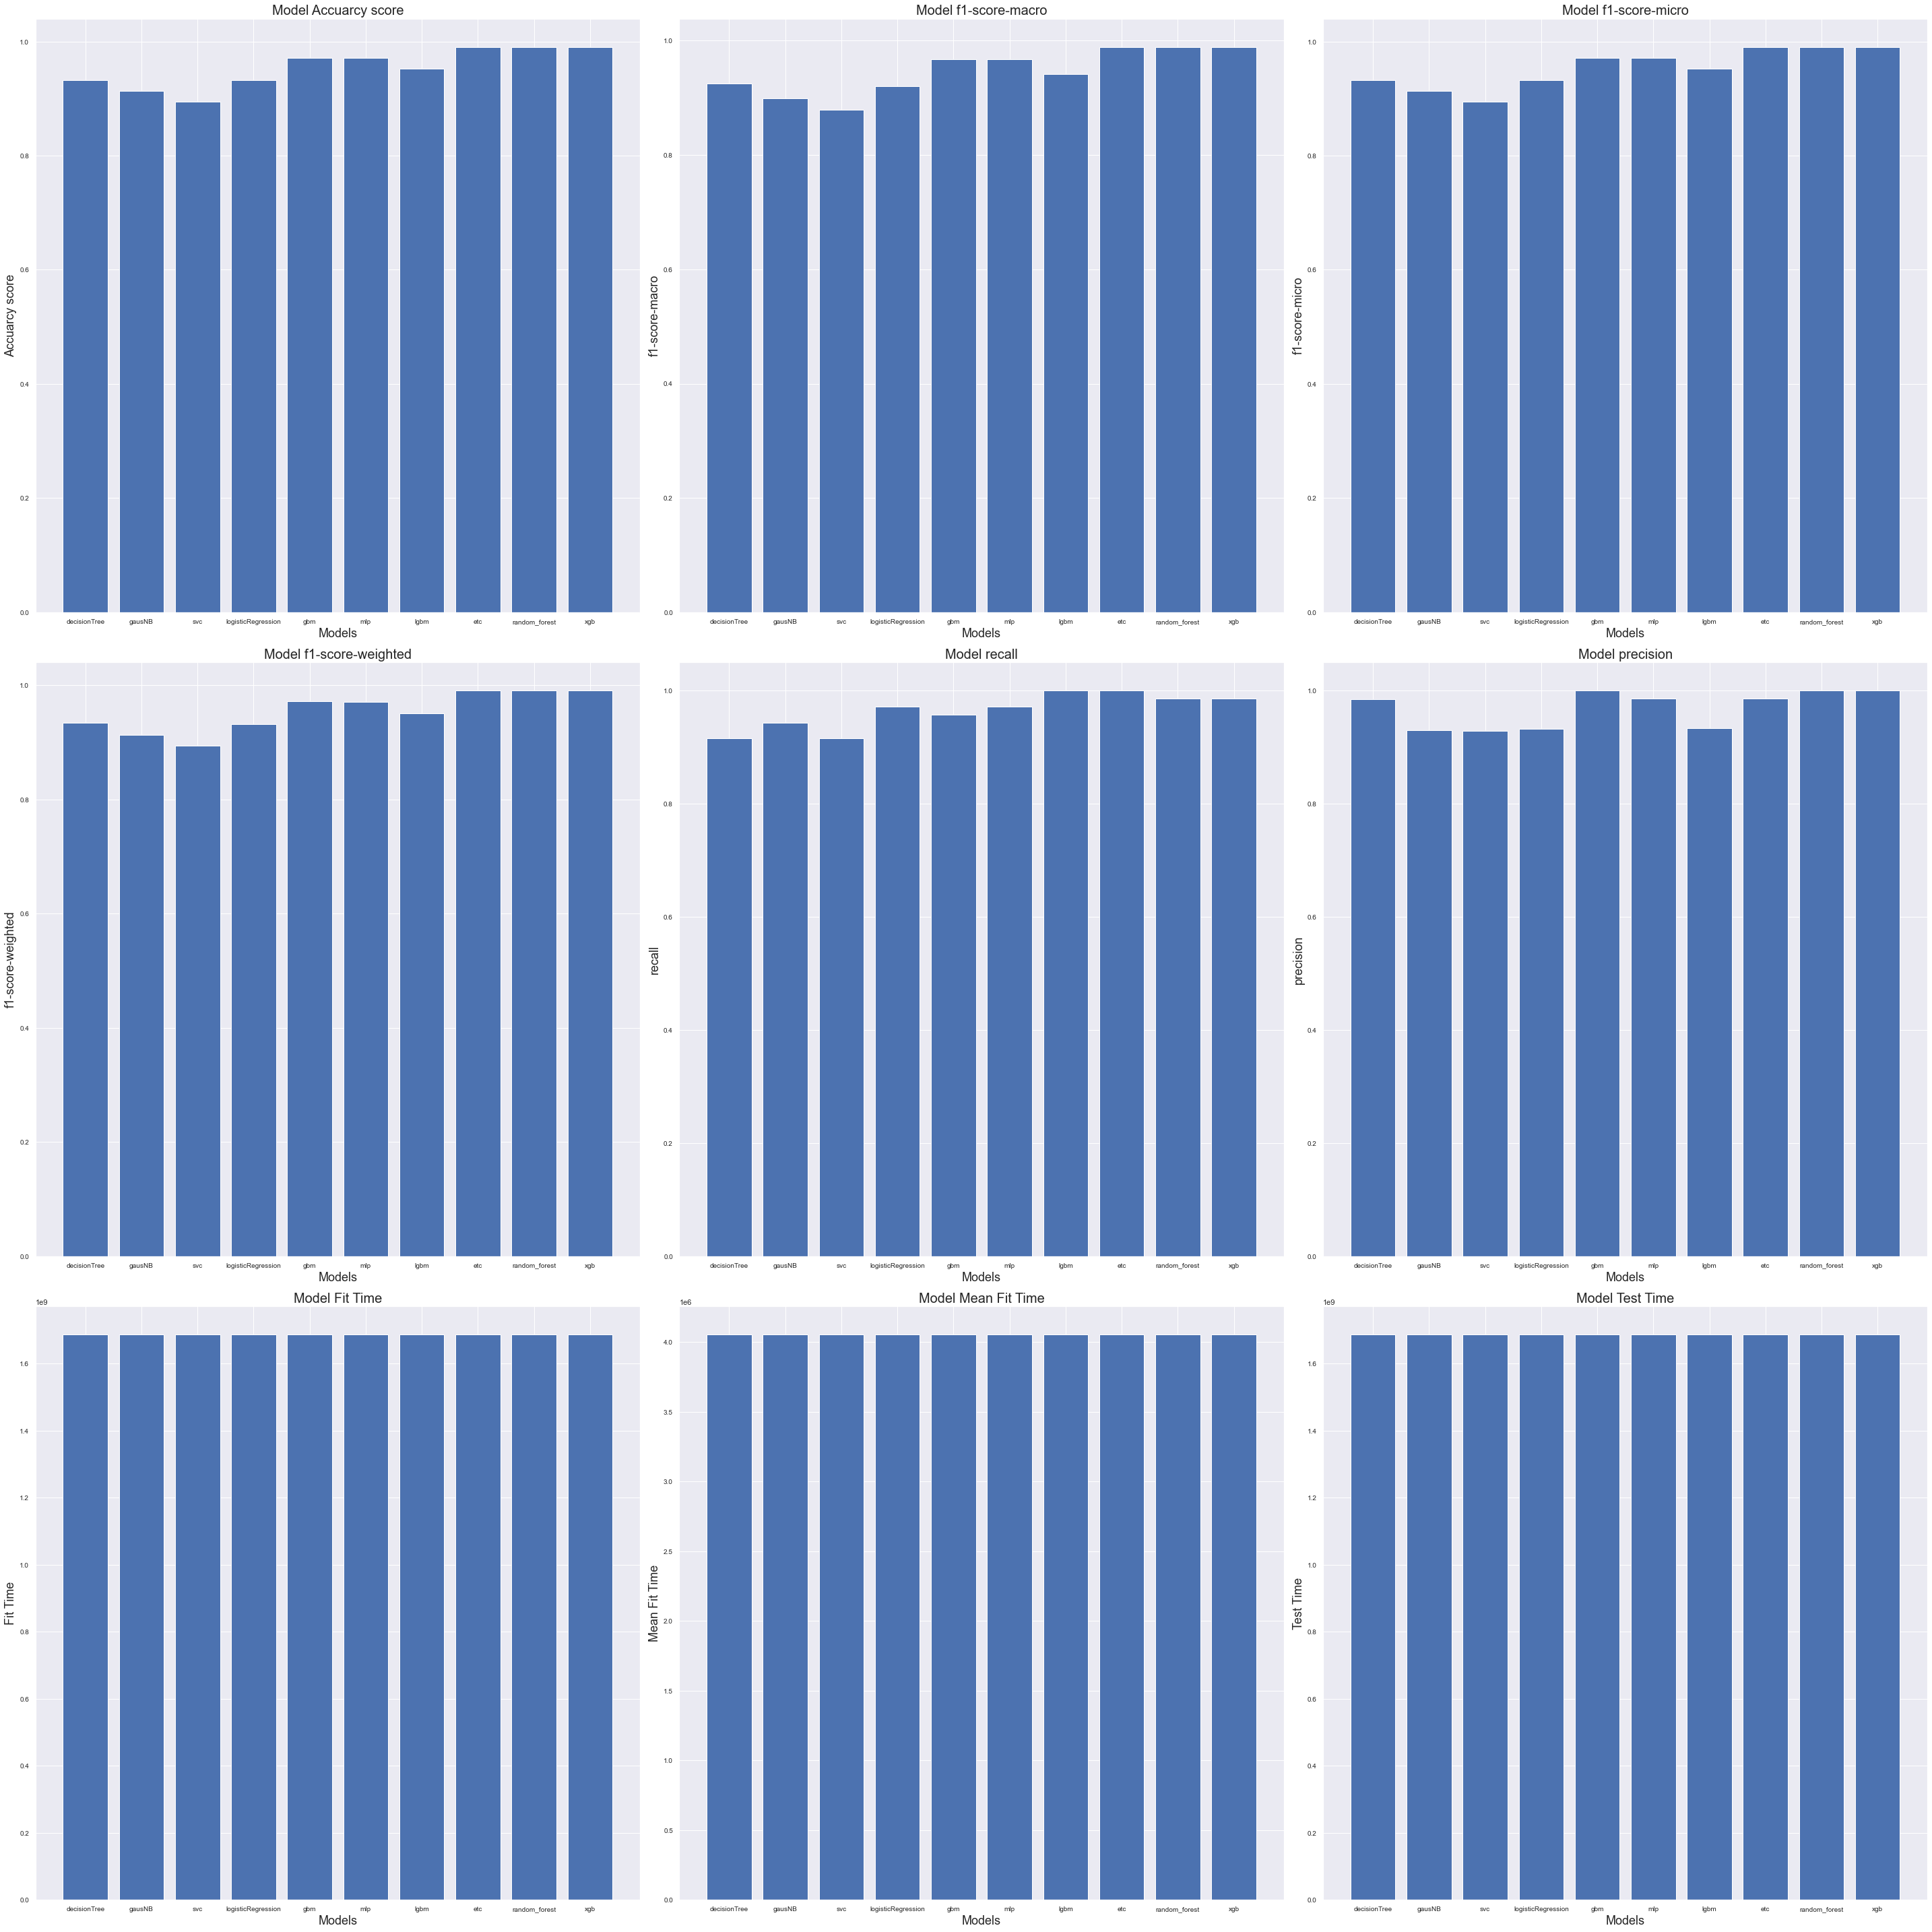

In [ ]:
# Plot the results
fig, axs = plt.subplots(3,3, figsize=(40, 40))
metrics = ['Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision', 'Fit Time', 'Mean Fit Time', 'Test Time']
model_names = results_df['Model'].tolist()

for i, ax in enumerate(axs.flat):
    metric = metrics[i]
    metric_values = results_df[metric].tolist()
    ax.bar(model_names, metric_values)
    ax.set_xlabel('Models', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.set_title(f'Model {metric}', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig("model_Stacking_Ensemble_metrics.png")
plt.show()

In [ ]:

# Train the  Max Voting Ensemble Boosting Regression model,
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import VotingClassifier

cv = KFold(n_splits=5, shuffle=True, random_state=42)
ensemble_maxVoting_models = []

for name, model in models:
    try:
        if isinstance(model, ExtraTreesClassifier):
            model.set_params(n_estimators=int(model.get_params()['n_estimators']),
                            max_depth = int(model.get_params()['max_depth'])
                            )
        if isinstance(model, RandomForestClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']))

        if isinstance(model, GradientBoostingClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             learning_rate=(model.get_params()['learning_rate']))



        if isinstance(model, lgb.LGBMClassifier):
            model.set_params(colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             min_split_gain=(model.get_params()['min_split_gain']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )
        if isinstance(model, XGBClassifier):
            model.set_params(learning_rate=(model.get_params()['learning_rate']),
                             colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )

        if isinstance(model, DecisionTreeClassifier):
            model.set_params(ccp_alpha=(model.get_params()['ccp_alpha']),
                             max_depth=int(model.get_params()['max_depth'])
                            )

        if isinstance(model, GaussianNB):
            model.set_params(var_smoothing=(model.get_params()['var_smoothing'])
                            )

        if isinstance(model, SVC):
            model.set_params(C=(model.get_params()['C']),
                             gamma=(model.get_params()['gamma'])
                            )

        if isinstance(model, LogisticRegression):
            model.set_params(C=(model.get_params()['C'])
                            )

        if isinstance(model, MLPClassifier):
            model.set_params(alpha=(model.get_params()['alpha']),
                             max_iter=(model.get_params()['max_iter'])
                            )



        print(model)
        level0 = list()
        level0.append((str(model), model))
        max_voting = VotingClassifier(estimators=[(str(name),model)], voting='hard')

        max_voting.fit(X_train, y_train)
        ensemble_maxVoting_models.append((name, max_voting))
    except Exception as e:
        print('hata /n',e)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7)
GaussianNB(var_smoothing=1e-10)
SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')
LogisticRegression(C=231.34818551397362)
GradientBoostingClassifier(learning_rate=0.6139225781915966, n_estimators=69,
                           random_state=42)
MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')
LGBMClassifier(colsample_bytree=0.8163918277196188, max_depth=15,
               min_split_gain=0.1472549856113242, n_estimators=87,
               reg_alpha=1.0835851529291876, reg_lambda=1.2037398089039828,
               subsample=0.387064086940639)
ExtraTreesClassifier(max_depth=2455, n_estimators=47, random_state=42)
RandomForestClassifier(max_depth=9530, n_estimators=22, random_state=42)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8947165815903877,
              enable_categorical=False, gamma=None, gpu_id=None,
     

In [ ]:
# Save the results to an Excel file
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
results = []

for name, model in ensemble_maxVoting_models:

    y_pred = model.predict(X_test)

    score = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test,y_pred ,average='macro')
    f1_mikro = f1_score(y_test,y_pred ,average='micro')
    f1_weighted = f1_score(y_test,y_pred ,average='weighted')
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    fit_time = time()
    mean_fit_time = fit_time / len(X_train)
    test_time = time()
    results.append([name, score, f1_macro, f1_mikro,f1_weighted,recall, precision,fit_time, mean_fit_time, test_time])

results_df = pd.DataFrame(results, columns=['Model','Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision','Fit Time', 'Mean Fit Time', 'Test Time'])
results_df.to_excel('model_max_voting_results.xlsx', index=False)

In [ ]:
results_df

,Model,Accuarcy score,f1-score-macro,f1-score-micro,f1-score-weighted,recall,precision,Fit Time,Mean Fit Time,Test Time
0,decisionTree,0.942308,0.936275,0.942308,0.943439,0.915493,1.000000,1.686309e+09,4.053628e+06,1.686309e+09
1,gausNB,0.913462,0.899301,0.913462,0.913098,0.943662,0.930556,1.686309e+09,4.053628e+06,1.686309e+09
2,svc,0.894231,0.878903,0.894231,0.894645,0.915493,0.928571,1.686309e+09,4.053628e+06,1.686309e+09
3,logisticRegression,0.923077,0.909722,0.923077,0.922409,0.957746,0.931507,1.686309e+09,4.053628e+06,1.686309e+09
4,gbm,0.971154,0.967470,0.971154,0.971470,0.957746,1.000000,1.686309e+09,4.053628e+06,1.686309e+09
5,mlp,0.990385,0.988811,0.990385,0.990344,1.000000,0.986111,1.686309e+09,4.053628e+06,1.686309e+09
6,lgbm,0.932692,0.920307,0.932692,0.931786,0.971831,0.932432,1.686309e+09,4.053628e+06,1.686309e+09
7,etc,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686309e+09,4.053628e+06,1.686309e+09
8,random_forest,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686309e+09,4.053628e+06,1.686309e+09
9,xgb,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686309e+09,4.053628e+06,1.686309e+09


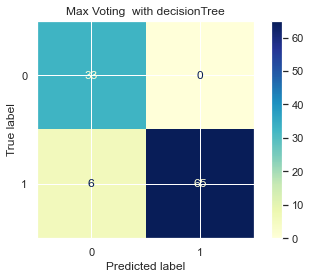

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        33
           1       1.00      0.92      0.96        71

    accuracy                           0.94       104
   macro avg       0.92      0.96      0.94       104
weighted avg       0.95      0.94      0.94       104



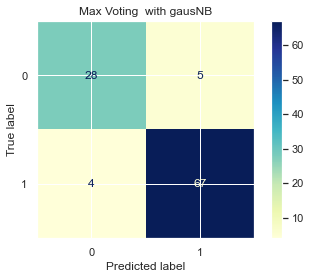

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



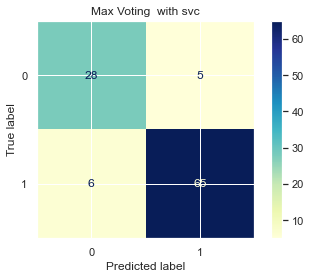

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.93      0.92      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.90      0.89      0.89       104



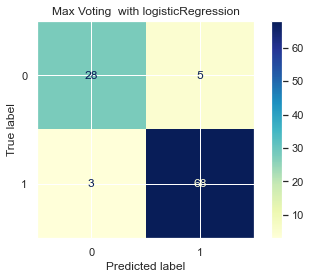

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



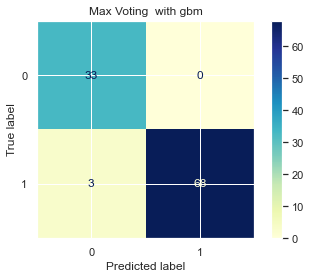

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



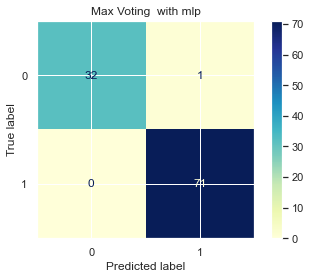

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.99      1.00      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



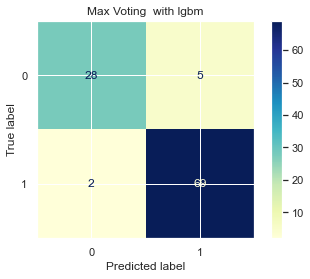

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.93      0.97      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.91      0.92       104
weighted avg       0.93      0.93      0.93       104



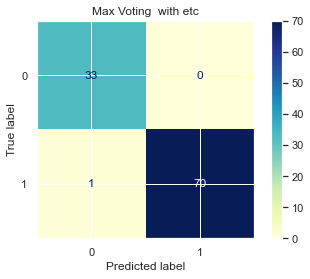

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



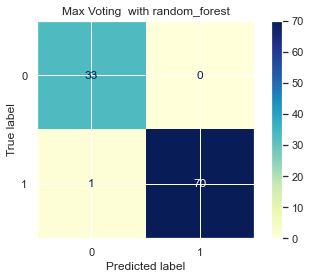

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



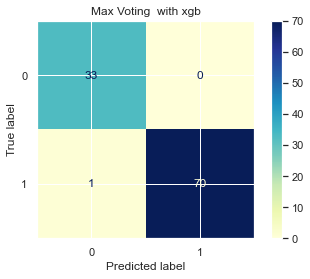

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
rocs = []
import seaborn as sn
for name, model in ensemble_maxVoting_models:
    y_pred = model.predict(X_test)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot(cmap=plt.cm.YlGnBu,)
    plt.title('Max Voting  with '+ name)
    plt.show()
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    rocs.append(["Max Voting "+ " " + name ,auc,false_positive_rate,true_positive_rate])


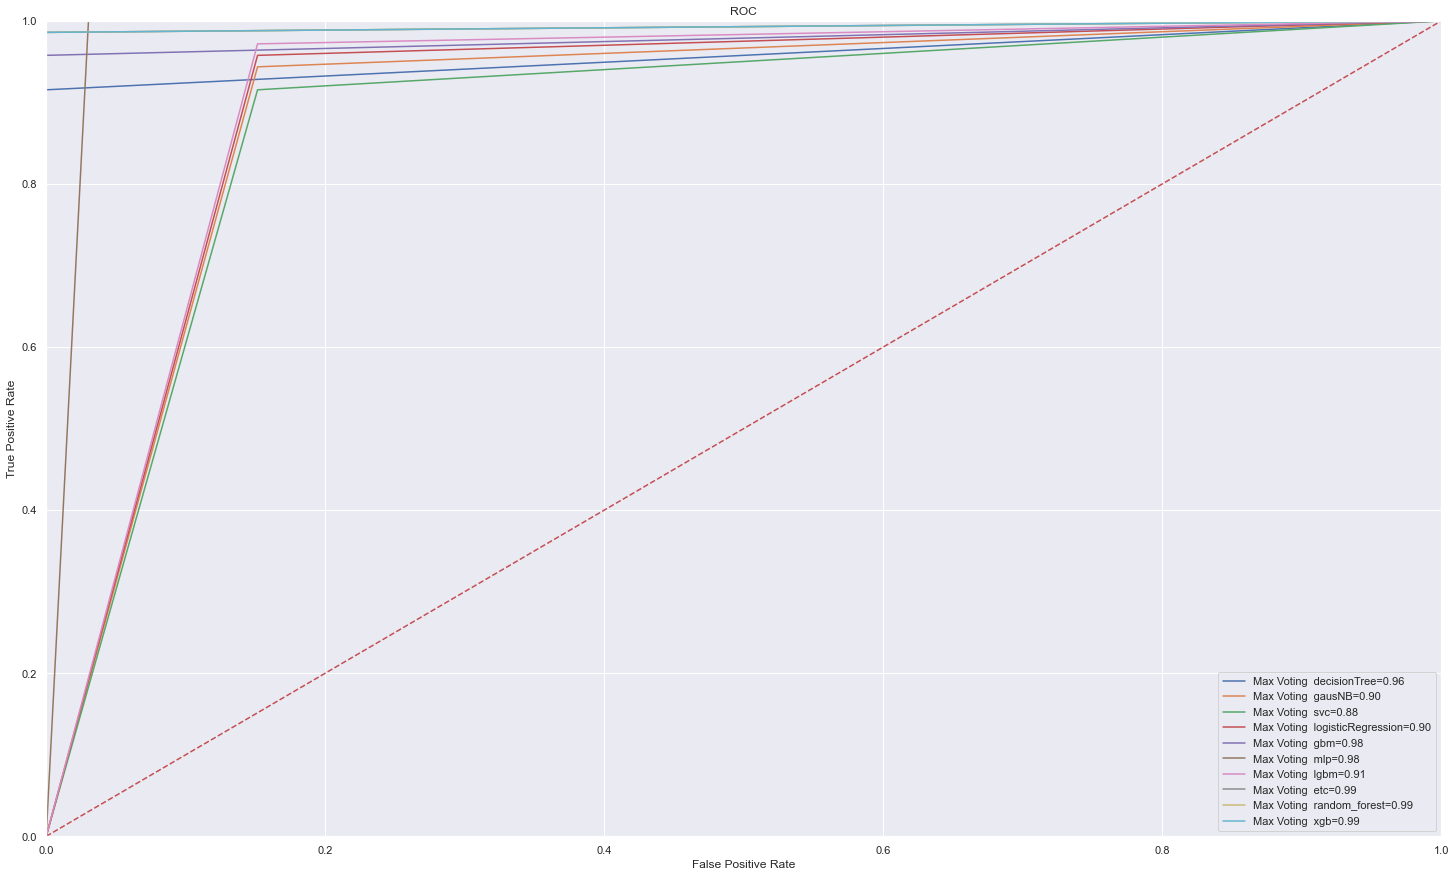

In [ ]:
plt.figure(figsize=(25, 15))
plt.title('ROC')
for i in range(len(rocs)):
    plt.plot(rocs[i][2], rocs[i][3], label= rocs[i][0]+'=%0.2f' %rocs[i][1])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

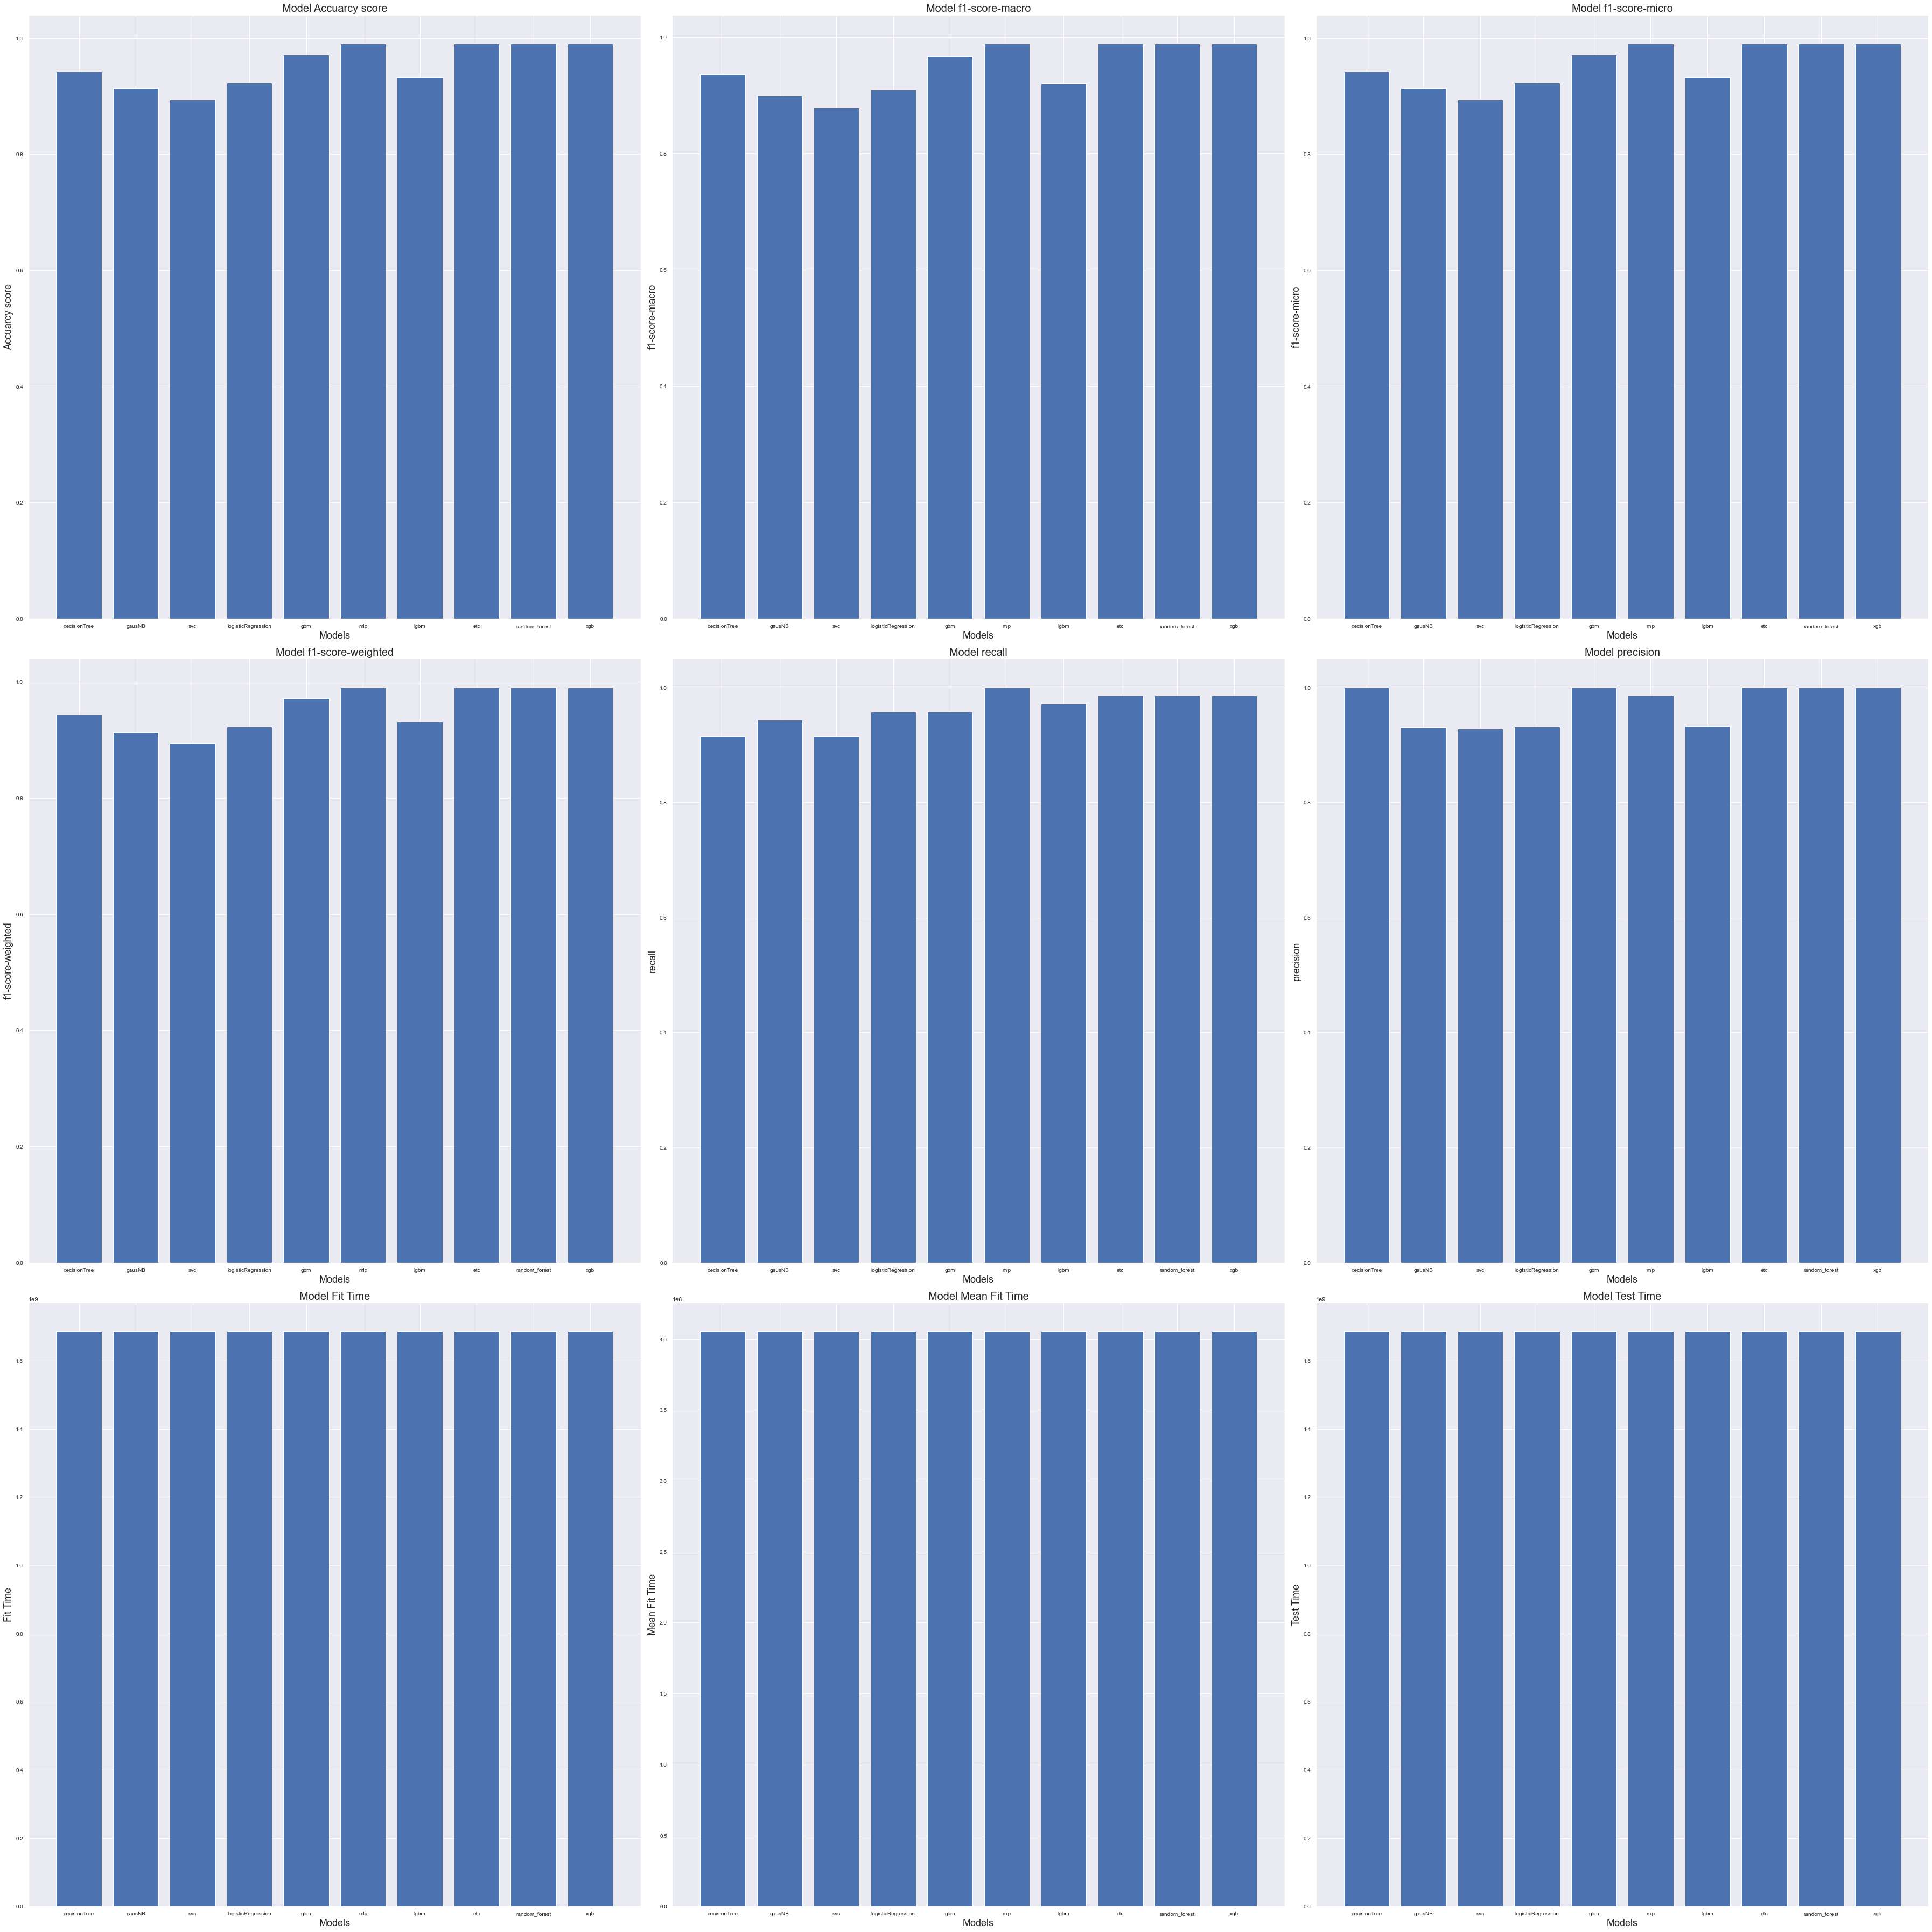

In [ ]:
# Plot the results
fig, axs = plt.subplots(3,3, figsize=(50, 50))
metrics = ['Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision', 'Fit Time', 'Mean Fit Time', 'Test Time']
model_names = results_df['Model'].tolist()

for i, ax in enumerate(axs.flat):
    metric = metrics[i]
    metric_values = results_df[metric].tolist()
    ax.bar(model_names, metric_values)
    ax.set_xlabel('Models', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.set_title(f'Model {metric}', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig("model_max_voting_metrics.png")
plt.show()

In [ ]:

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import VotingClassifier

cv = KFold(n_splits=5, shuffle=True, random_state=42)
ensemble_soft_voting_models = []

for name, model in models:
    try:
        if isinstance(model, ExtraTreesClassifier):
            model.set_params(n_estimators=int(model.get_params()['n_estimators']),
                            max_depth = int(model.get_params()['max_depth'])
                            )
        if isinstance(model, RandomForestClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']))

        if isinstance(model, GradientBoostingClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             learning_rate=(model.get_params()['learning_rate']))



        if isinstance(model, lgb.LGBMClassifier):
            model.set_params(colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             min_split_gain=(model.get_params()['min_split_gain']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )
        if isinstance(model, XGBClassifier):
            model.set_params(learning_rate=(model.get_params()['learning_rate']),
                             colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )

        if isinstance(model, DecisionTreeClassifier):
            model.set_params(ccp_alpha=(model.get_params()['ccp_alpha']),
                             max_depth=int(model.get_params()['max_depth'])
                            )

        if isinstance(model, GaussianNB):
            model.set_params(var_smoothing=(model.get_params()['var_smoothing'])
                            )

        if isinstance(model, SVC):
            model.set_params(C=(model.get_params()['C']),
                             gamma=(model.get_params()['gamma'])
                            )

        if isinstance(model, LogisticRegression):
            model.set_params(C=(model.get_params()['C'])
                            )

        if isinstance(model, MLPClassifier):
            model.set_params(alpha=(model.get_params()['alpha']),
                             max_iter=(model.get_params()['max_iter'])
                            )




        print(model)
        level0 = list()
        level0.append((str(model), model))
        max_voting = VotingClassifier(estimators=[(str(name),model)], voting='soft')

        max_voting.fit(X_train, y_train)
        ensemble_soft_voting_models.append((name, max_voting))
    except Exception as e:
        print('hata /n',e)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7)
GaussianNB(var_smoothing=1e-10)
SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')
LogisticRegression(C=231.34818551397362)
GradientBoostingClassifier(learning_rate=0.6139225781915966, n_estimators=69,
                           random_state=42)
MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')
LGBMClassifier(colsample_bytree=0.8163918277196188, max_depth=15,
               min_split_gain=0.1472549856113242, n_estimators=87,
               reg_alpha=1.0835851529291876, reg_lambda=1.2037398089039828,
               subsample=0.387064086940639)
ExtraTreesClassifier(max_depth=2455, n_estimators=47, random_state=42)
RandomForestClassifier(max_depth=9530, n_estimators=22, random_state=42)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8947165815903877,
              enable_categorical=False, gamma=None, gpu_id=None,
     

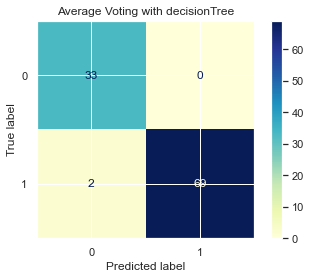

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        33
           1       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



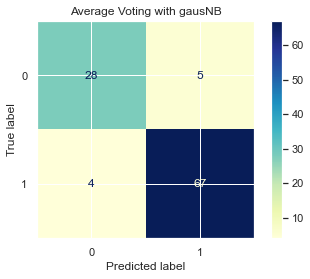

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104

1


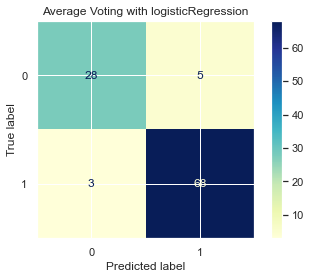

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



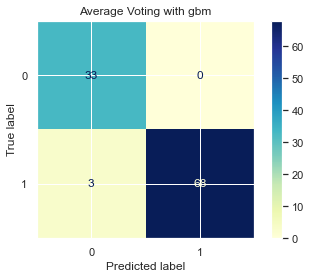

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



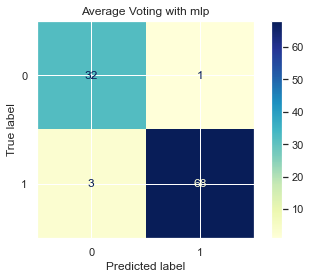

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.99      0.96      0.97        71

    accuracy                           0.96       104
   macro avg       0.95      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



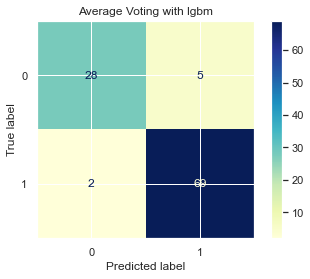

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.93      0.97      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.91      0.92       104
weighted avg       0.93      0.93      0.93       104



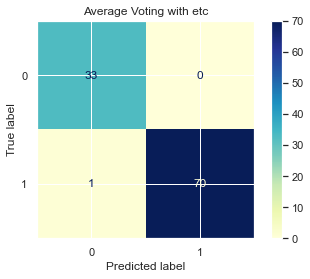

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



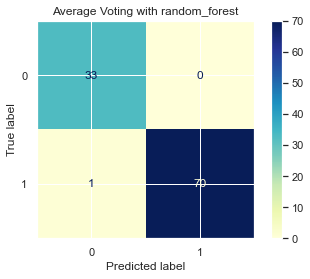

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



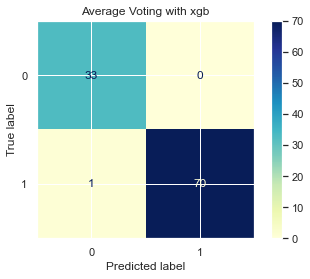

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

import seaborn as sn
rocs = []
for name, model in ensemble_soft_voting_models:
    try:
        y_pred = model.predict(X_test)

        confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

        cm_display.plot(cmap=plt.cm.YlGnBu,)
        plt.title('Average Voting with '+ name)
        plt.show()
        from sklearn.metrics import classification_report
        print(classification_report(y_test, y_pred))
        auc = metrics.roc_auc_score(y_test, y_pred)
        false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
        rocs.append(["Average Voting "+ " " + name ,auc,false_positive_rate,true_positive_rate])
    except:
            print(1)

In [ ]:
# Save the results to an Excel file
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
results = []

for name, model in ensemble_soft_voting_models:
    try:
        y_pred = model.predict(X_test)

        score = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test,y_pred ,average='macro')
        f1_mikro = f1_score(y_test,y_pred ,average='micro')
        f1_weighted = f1_score(y_test,y_pred ,average='weighted')
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        fit_time = time()
        mean_fit_time = fit_time / len(X_train)
        test_time = time()
        results.append([name, score, f1_macro, f1_mikro,f1_weighted,recall, precision,fit_time, mean_fit_time, test_time])
    except Exception as e:
        print(e)
results_df = pd.DataFrame(results, columns=['Model','Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision','Fit Time', 'Mean Fit Time', 'Test Time'])
results_df.to_excel('model_average_soft_voting_results.xlsx', index=False)

predict_proba is not available when  probability=False


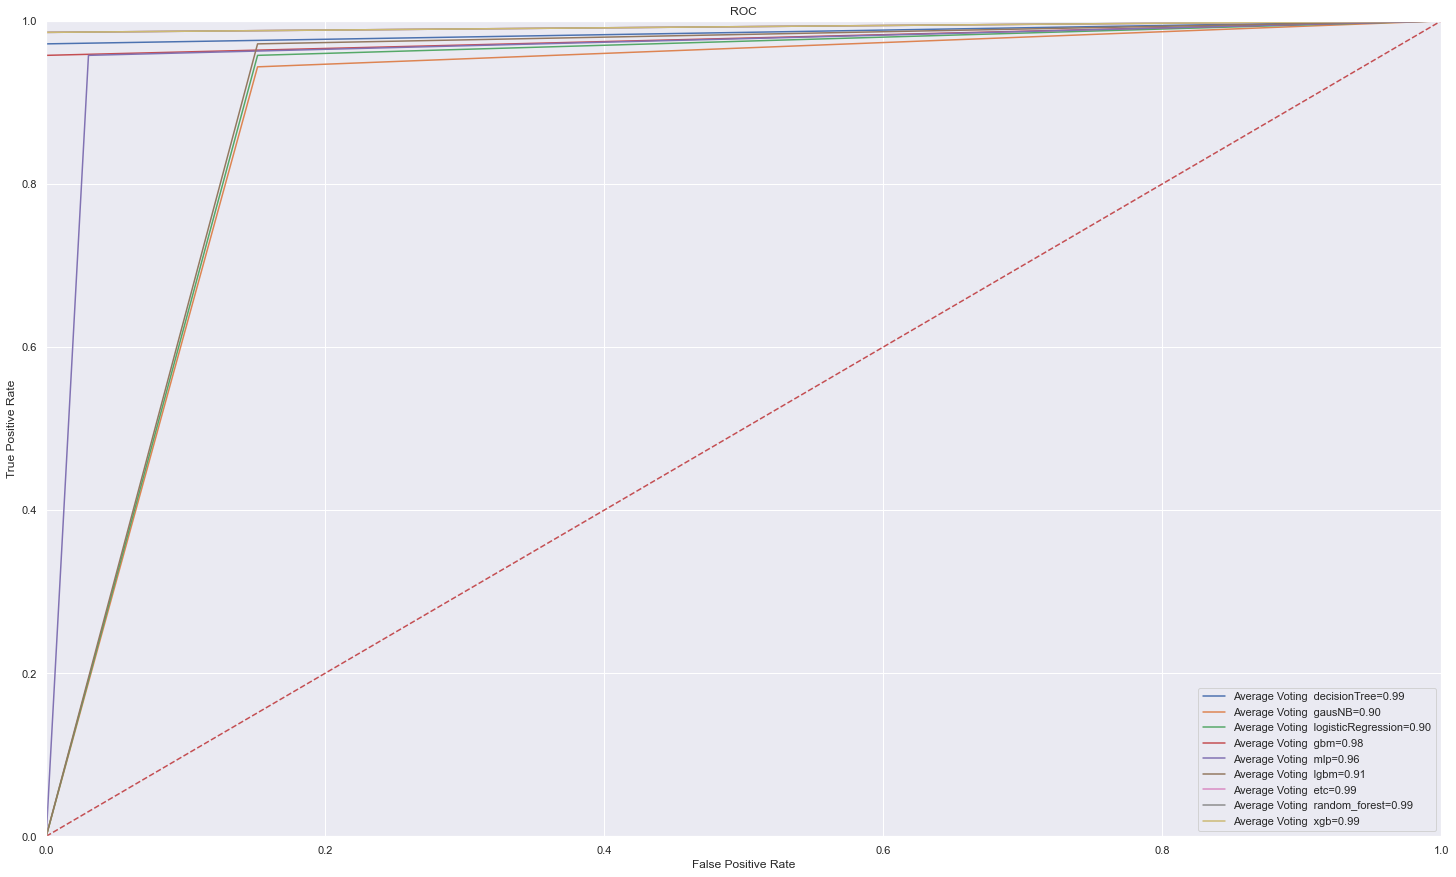

In [ ]:
plt.figure(figsize=(25, 15))
plt.title('ROC')
for i in range(len(rocs)):
    plt.plot(rocs[i][2], rocs[i][3], label= rocs[i][0]+'=%0.2f' %rocs[i][1])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
results_df

,Model,Accuarcy score,f1-score-macro,f1-score-micro,f1-score-weighted,recall,precision,Fit Time,Mean Fit Time,Test Time
0,decisionTree,0.980769,0.978151,0.980769,0.980915,0.971831,1.000000,1.686310e+09,4.053629e+06,1.686310e+09
1,gausNB,0.913462,0.899301,0.913462,0.913098,0.943662,0.930556,1.686310e+09,4.053629e+06,1.686310e+09
2,logisticRegression,0.923077,0.909722,0.923077,0.922409,0.957746,0.931507,1.686310e+09,4.053629e+06,1.686310e+09
3,gbm,0.971154,0.967470,0.971154,0.971470,0.957746,1.000000,1.686310e+09,4.053629e+06,1.686310e+09
4,mlp,0.961538,0.956303,0.961538,0.961829,0.957746,0.985507,1.686310e+09,4.053629e+06,1.686310e+09
5,lgbm,0.932692,0.920307,0.932692,0.931786,0.971831,0.932432,1.686310e+09,4.053629e+06,1.686310e+09
6,etc,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686310e+09,4.053629e+06,1.686310e+09
7,random_forest,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686310e+09,4.053629e+06,1.686310e+09
8,xgb,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686310e+09,4.053629e+06,1.686310e+09


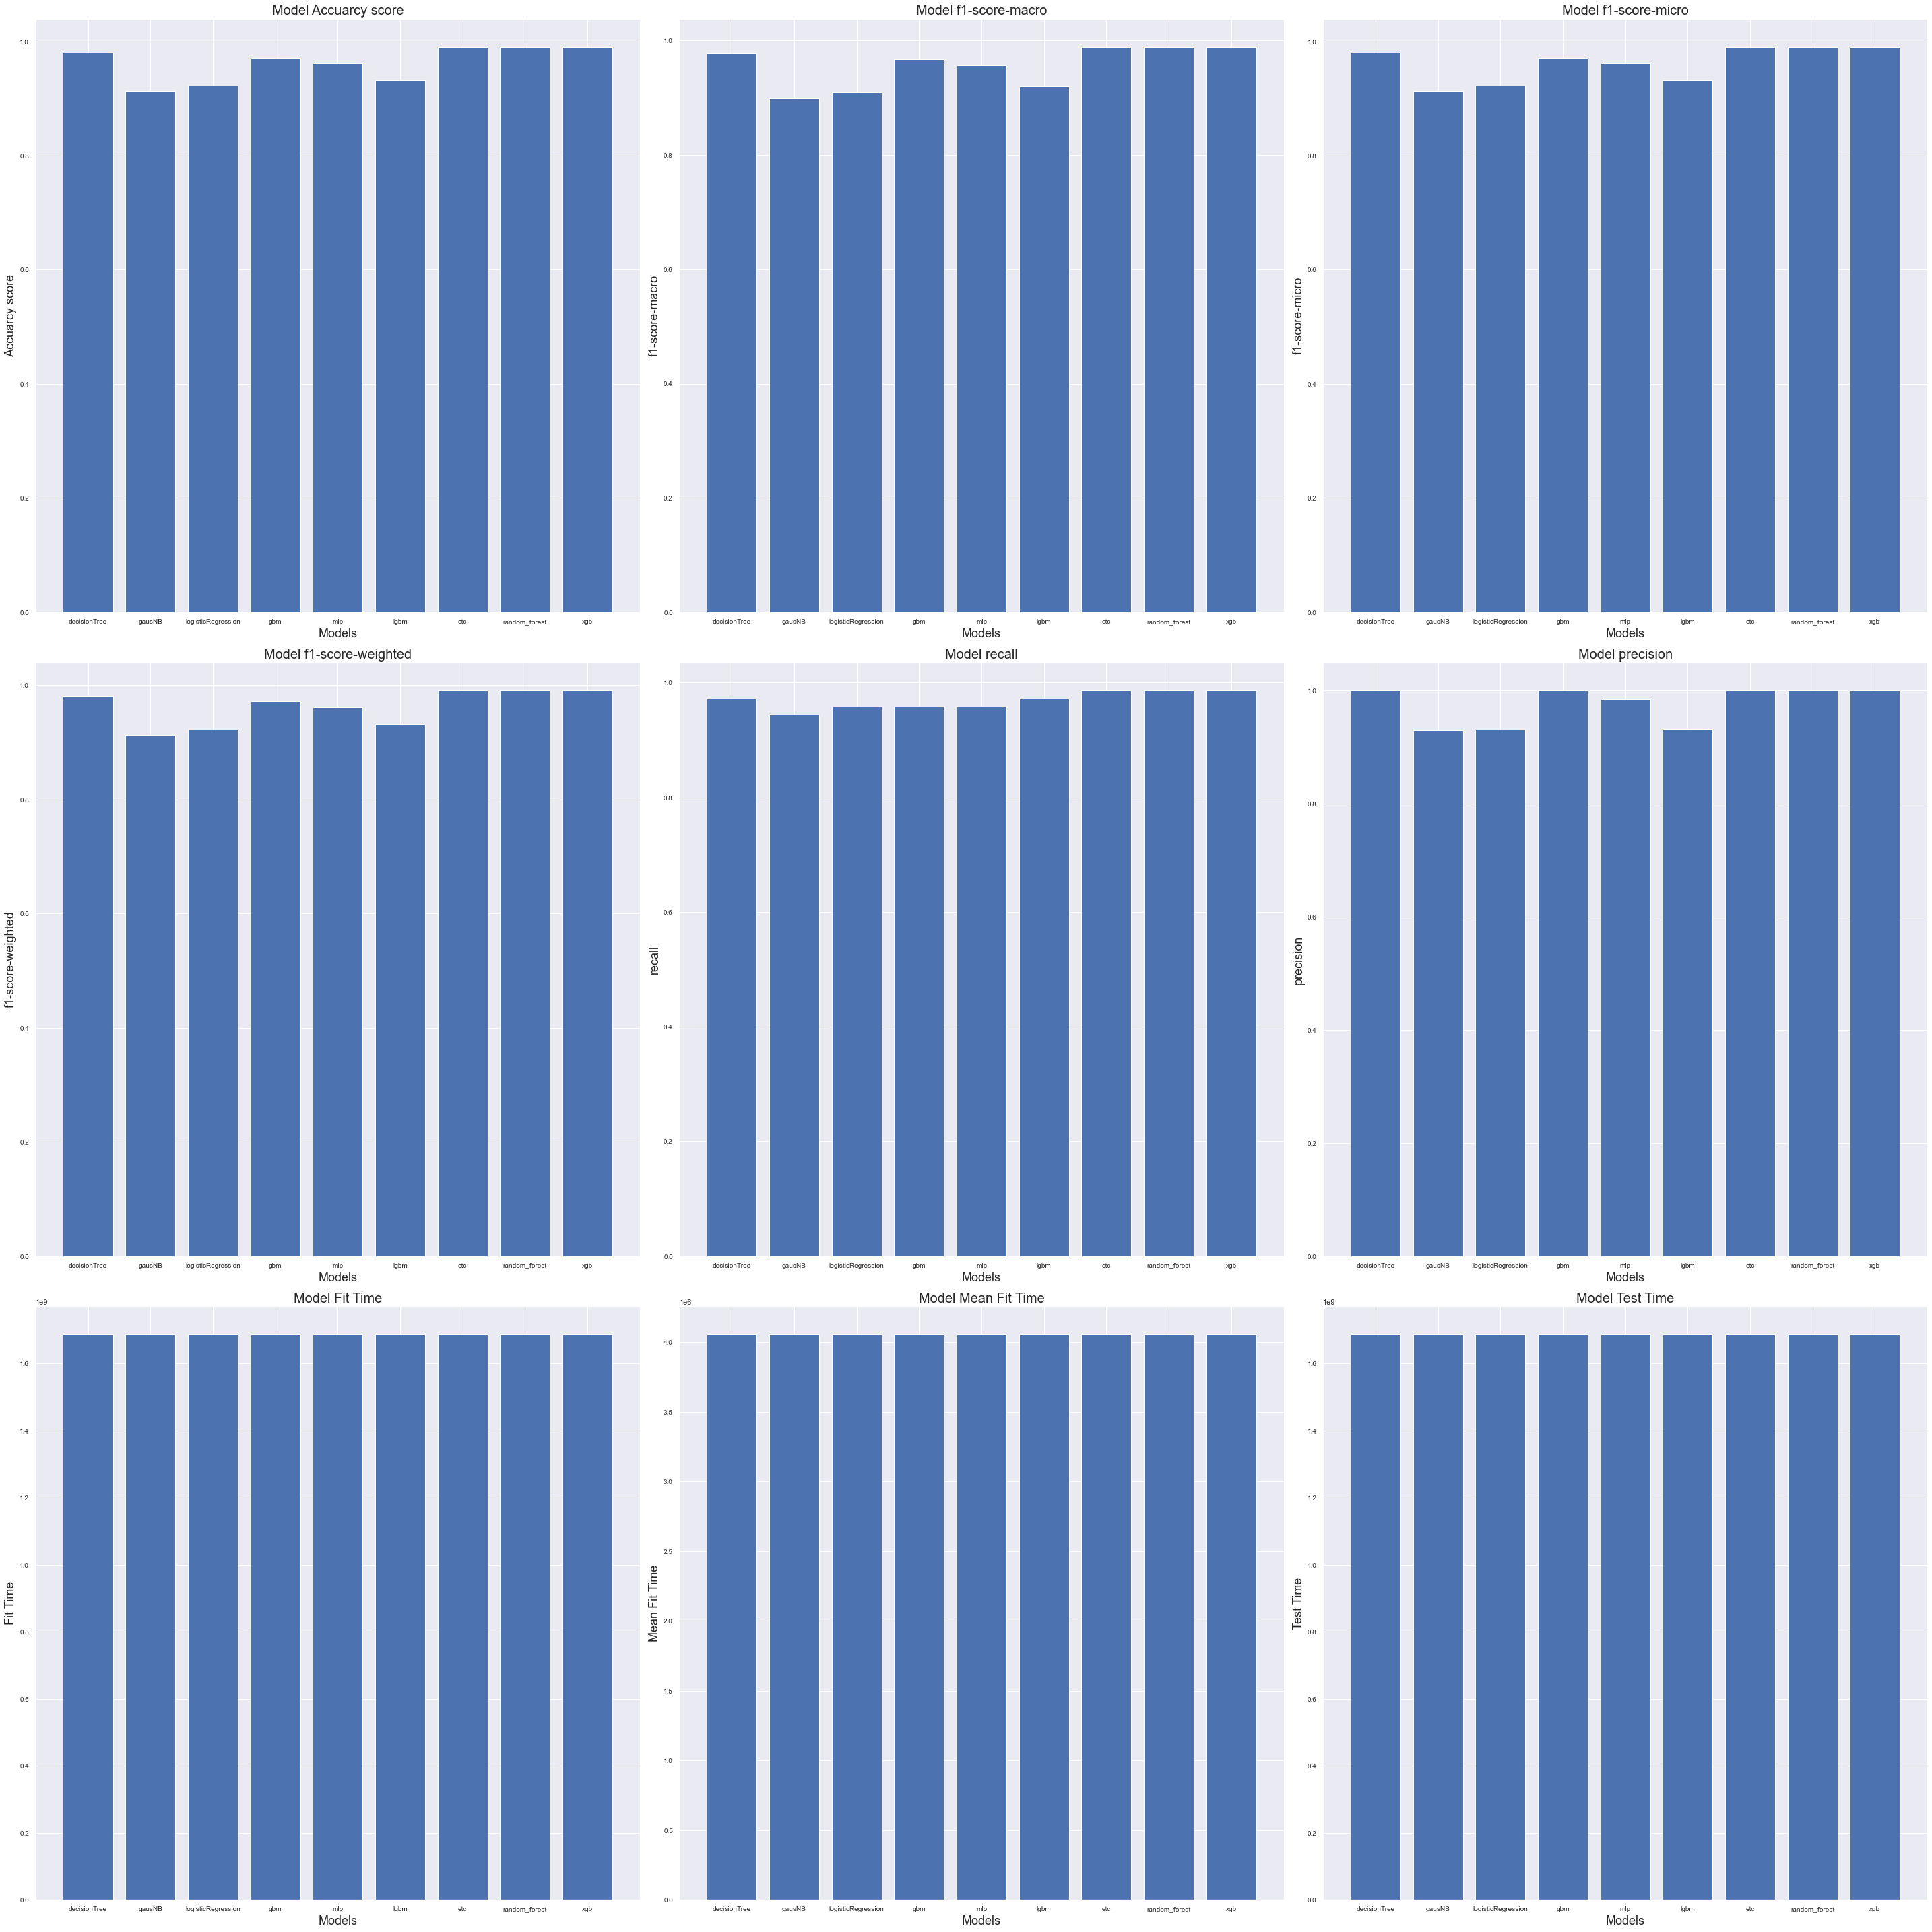

In [ ]:
# Plot the results
fig, axs = plt.subplots(3,3, figsize=(40, 40))
metrics = ['Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision', 'Fit Time', 'Mean Fit Time', 'Test Time']
model_names = results_df['Model'].tolist()

for i, ax in enumerate(axs.flat):
    metric = metrics[i]
    metric_values = results_df[metric].tolist()
    ax.bar(model_names, metric_values)
    ax.set_xlabel('Models', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.set_title(f'Model {metric}', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig("model_soft_voting_metrics.png")
plt.show()

In [ ]:

# Train the Soft Model
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import VotingClassifier

cv = KFold(n_splits=5, shuffle=True, random_state=42)
soft_models = []

for name, model in models:
    try:
        if isinstance(model, ExtraTreesClassifier):
            model.set_params(n_estimators=int(model.get_params()['n_estimators']),
                            max_depth = int(model.get_params()['max_depth'])
                            )
        if isinstance(model, RandomForestClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']))

        if isinstance(model, GradientBoostingClassifier):
            model.set_params(max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             learning_rate=(model.get_params()['learning_rate']))



        if isinstance(model, lgb.LGBMClassifier):
            model.set_params(colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             min_split_gain=(model.get_params()['min_split_gain']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )
        if isinstance(model, XGBClassifier):
            model.set_params(learning_rate=(model.get_params()['learning_rate']),
                             colsample_bytree=(model.get_params()['colsample_bytree']),
                             max_depth=int(model.get_params()['max_depth']),
                             n_estimators=int(model.get_params()['n_estimators']),
                             reg_alpha=(model.get_params()['reg_alpha']),
                             reg_lambda=(model.get_params()['reg_lambda']),
                             subsample=(model.get_params()['subsample'])
                            )

        if isinstance(model, DecisionTreeClassifier):
            model.set_params(ccp_alpha=(model.get_params()['ccp_alpha']),
                             max_depth=int(model.get_params()['max_depth'])
                            )

        if isinstance(model, GaussianNB):
            model.set_params(var_smoothing=(model.get_params()['var_smoothing'])
                            )

        if isinstance(model, SVC):
            model.set_params(C=(model.get_params()['C']),
                             gamma=(model.get_params()['gamma'])
                            )

        if isinstance(model, LogisticRegression):
            model.set_params(C=(model.get_params()['C'])
                            )

        if isinstance(model, MLPClassifier):
            model.set_params(alpha=(model.get_params()['alpha']),
                             max_iter=(model.get_params()['max_iter'])
                            )



        print(model)


        model.fit(X_train, y_train)
        soft_models.append((name, model))
    except Exception as e:
        print('hata /n',e)

DecisionTreeClassifier(ccp_alpha=1e-05, max_depth=7)
GaussianNB(var_smoothing=1e-10)
SVC(C=3.5935257455272436, gamma=1.549970109349049, kernel='linear')
LogisticRegression(C=231.34818551397362)
GradientBoostingClassifier(learning_rate=0.6139225781915966, n_estimators=69,
                           random_state=42)
MLPClassifier(alpha=0.09360867552213359, max_iter=1491.0, solver='lbfgs')
LGBMClassifier(colsample_bytree=0.8163918277196188, max_depth=15,
               min_split_gain=0.1472549856113242, n_estimators=87,
               reg_alpha=1.0835851529291876, reg_lambda=1.2037398089039828,
               subsample=0.387064086940639)
ExtraTreesClassifier(max_depth=2455, n_estimators=47, random_state=42)
RandomForestClassifier(max_depth=9530, n_estimators=22, random_state=42)
XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8947165815903877,
              enable_categorical=False, gamma=None, gpu_id=None,
     

In [ ]:
# Save the results to an Excel file
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score
results = []

for name, model in soft_models:
    try:
        y_pred = model.predict(X_test)

        score = accuracy_score(y_test, y_pred)
        f1_macro = f1_score(y_test,y_pred ,average='macro')
        f1_mikro = f1_score(y_test,y_pred ,average='micro')
        f1_weighted = f1_score(y_test,y_pred ,average='weighted')
        recall = recall_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)

        fit_time = time()
        mean_fit_time = fit_time / len(X_train)
        test_time = time()
        results.append([name, score, f1_macro, f1_mikro,f1_weighted,recall, precision,fit_time, mean_fit_time, test_time])
    except:
        print(1)
results_df = pd.DataFrame(results, columns=['Model','Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision','Fit Time', 'Mean Fit Time', 'Test Time'])
results_df.to_excel('soft_models.xlsx', index=False)

In [ ]:
results_df

,Model,Accuarcy score,f1-score-macro,f1-score-micro,f1-score-weighted,recall,precision,Fit Time,Mean Fit Time,Test Time
0,decisionTree,0.942308,0.935404,0.942308,0.943120,0.929577,0.985075,1.686557e+09,4.054223e+06,1.686557e+09
1,gausNB,0.913462,0.899301,0.913462,0.913098,0.943662,0.930556,1.686557e+09,4.054223e+06,1.686557e+09
2,svc,0.894231,0.878903,0.894231,0.894645,0.915493,0.928571,1.686557e+09,4.054223e+06,1.686557e+09
3,logisticRegression,0.923077,0.909722,0.923077,0.922409,0.957746,0.931507,1.686557e+09,4.054223e+06,1.686557e+09
4,gbm,0.971154,0.967470,0.971154,0.971470,0.957746,1.000000,1.686557e+09,4.054223e+06,1.686557e+09
5,mlp,0.913462,0.899301,0.913462,0.913098,0.943662,0.930556,1.686557e+09,4.054223e+06,1.686557e+09
6,lgbm,0.932692,0.920307,0.932692,0.931786,0.971831,0.932432,1.686557e+09,4.054223e+06,1.686557e+09
7,etc,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686557e+09,4.054223e+06,1.686557e+09
8,random_forest,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686557e+09,4.054223e+06,1.686557e+09
9,xgb,0.990385,0.988991,0.990385,0.990422,0.985915,1.000000,1.686557e+09,4.054223e+06,1.686557e+09


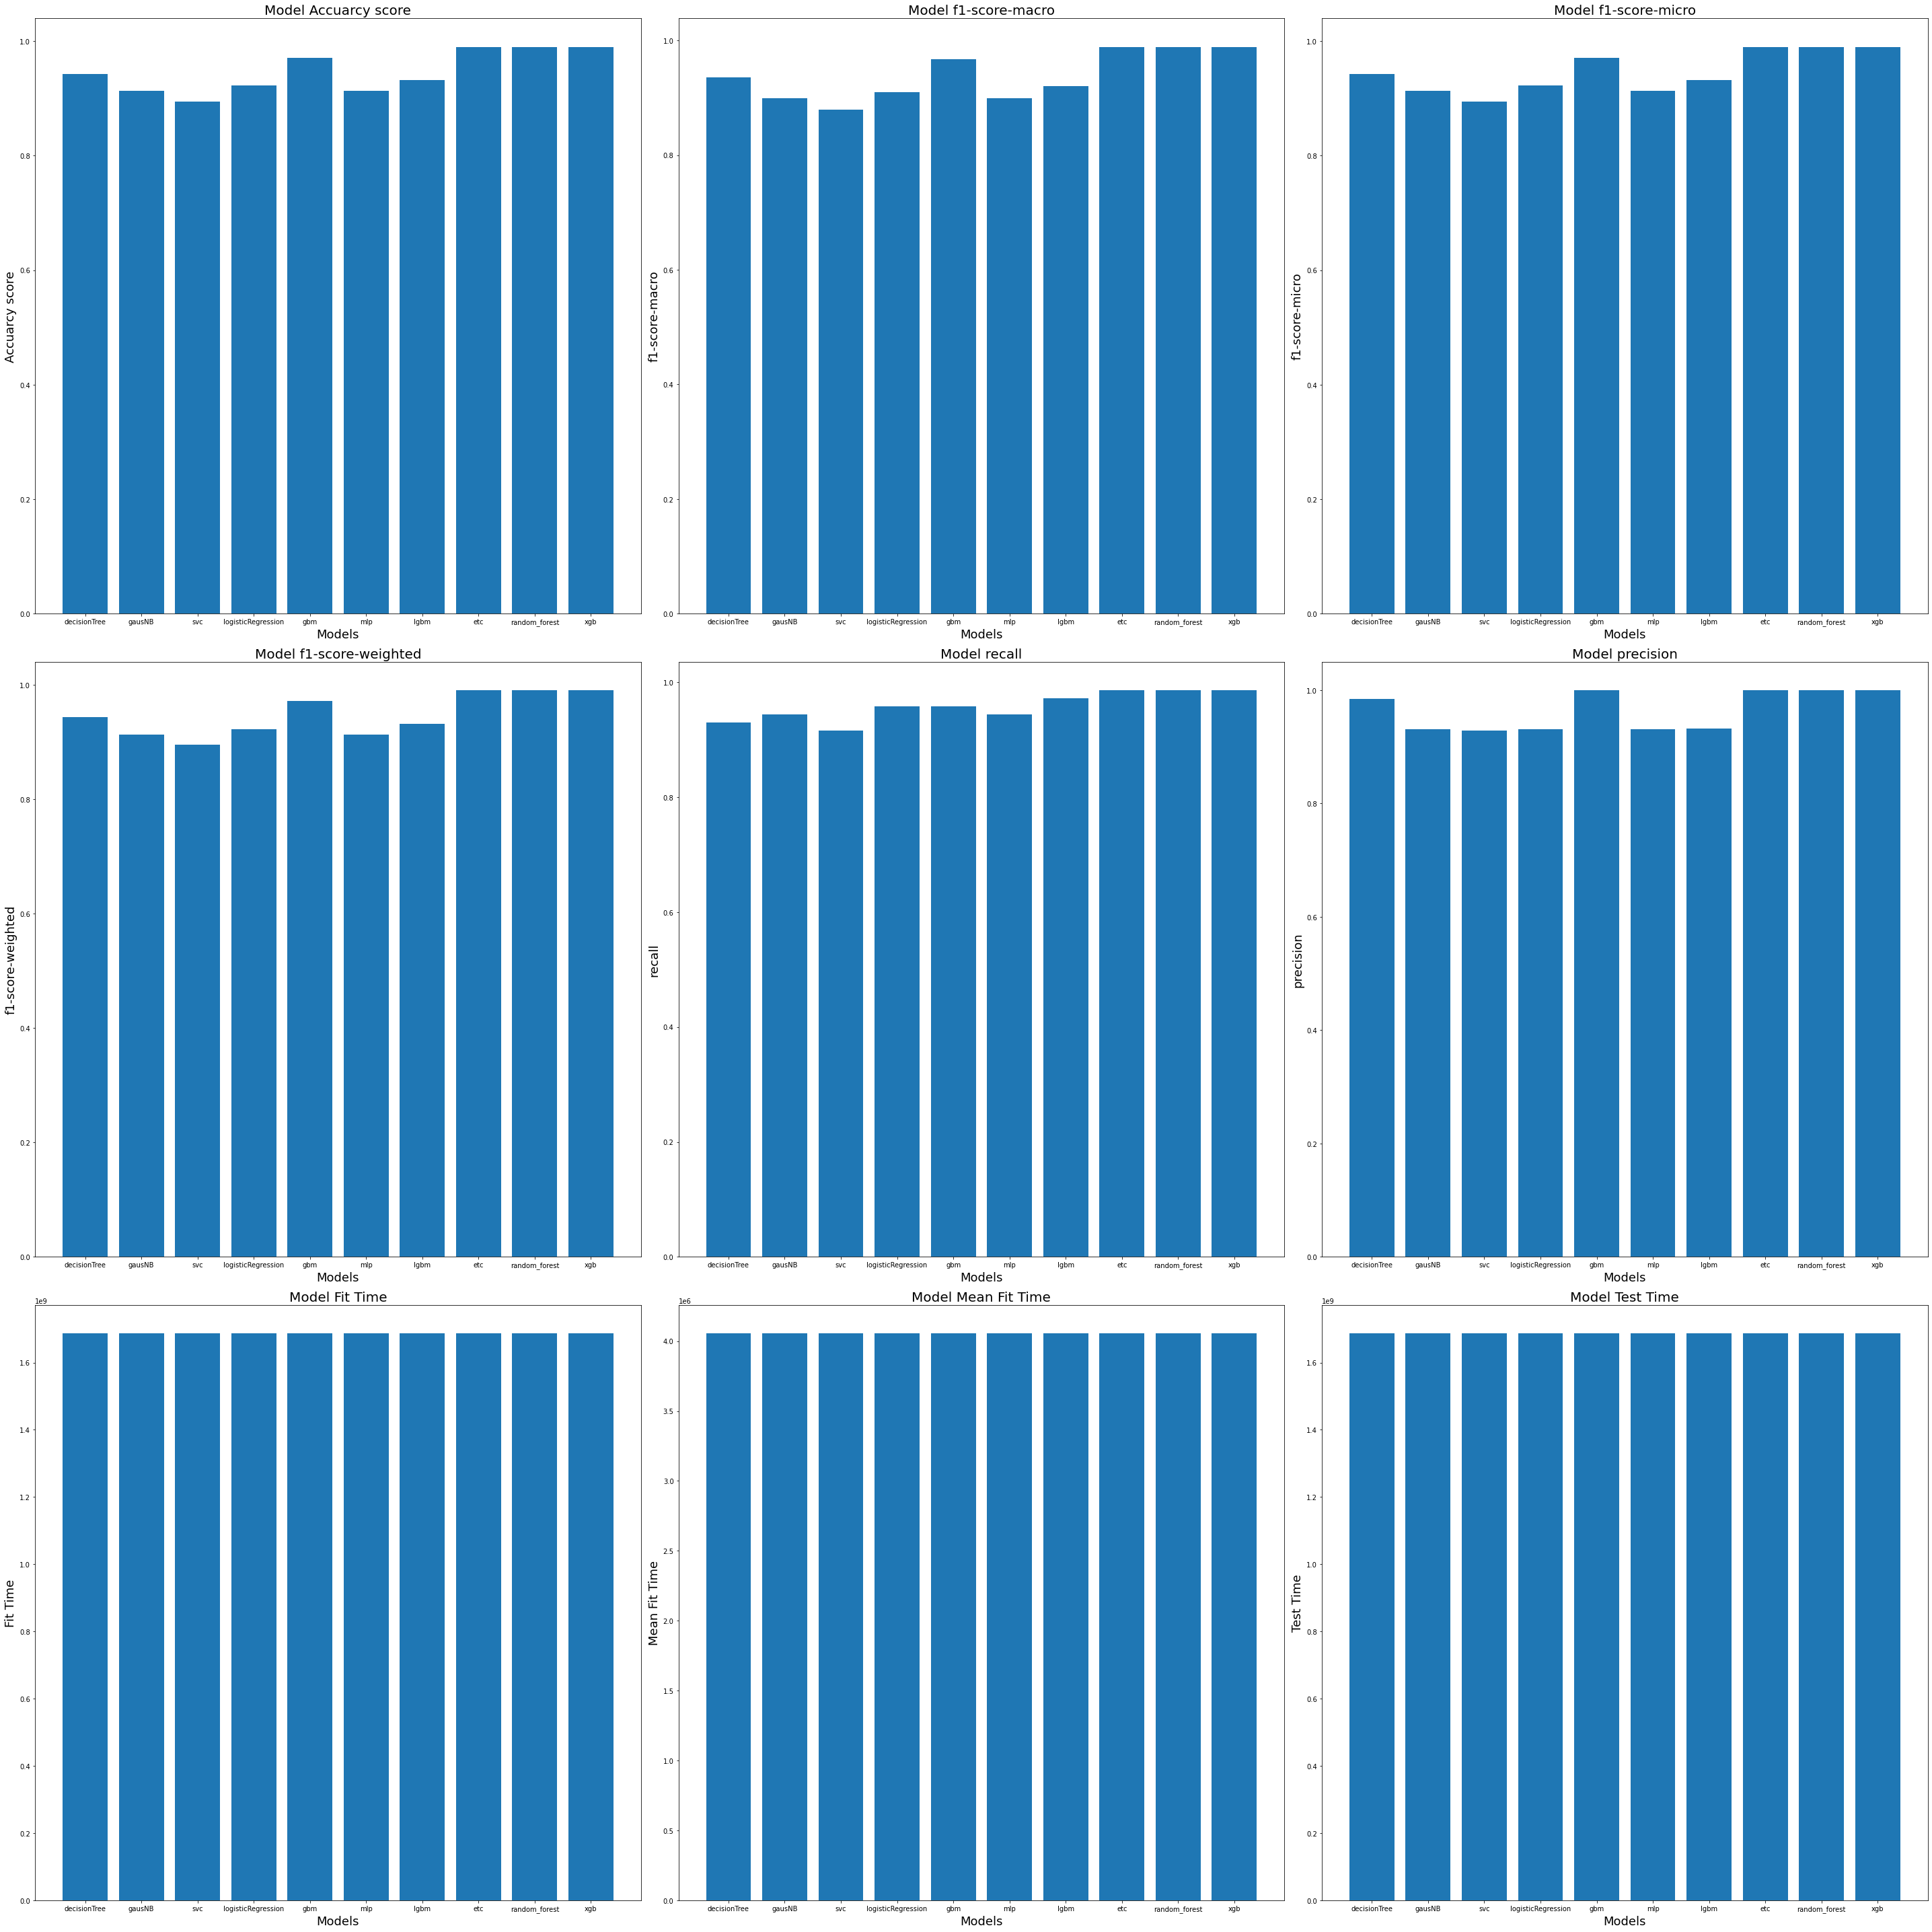

In [ ]:
# Plot the results
fig, axs = plt.subplots(3,3, figsize=(40, 40))
metrics = ['Accuarcy score', 'f1-score-macro', 'f1-score-micro', 'f1-score-weighted','recall','precision', 'Fit Time', 'Mean Fit Time', 'Test Time']
model_names = results_df['Model'].tolist()

for i, ax in enumerate(axs.flat):
    metric = metrics[i]
    metric_values = results_df[metric].tolist()
    ax.bar(model_names, metric_values)
    ax.set_xlabel('Models', fontsize=18)
    ax.set_ylabel(metric, fontsize=18)
    ax.set_title(f'Model {metric}', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.savefig("soft_models_metrics.png")
plt.show()

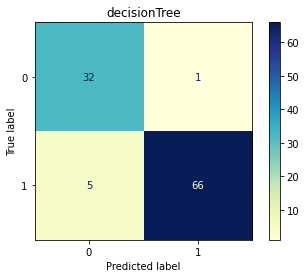

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        33
           1       0.99      0.93      0.96        71

    accuracy                           0.94       104
   macro avg       0.92      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



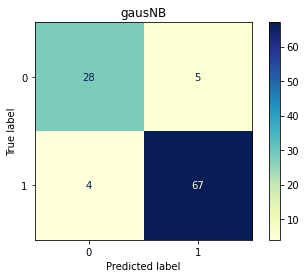

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



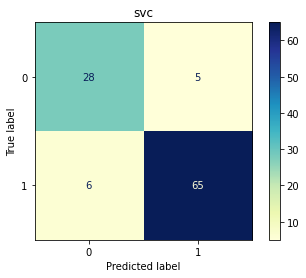

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.93      0.92      0.92        71

    accuracy                           0.89       104
   macro avg       0.88      0.88      0.88       104
weighted avg       0.90      0.89      0.89       104



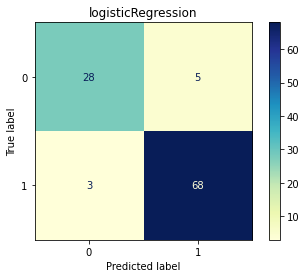

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



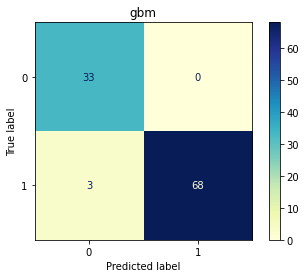

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        33
           1       1.00      0.96      0.98        71

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



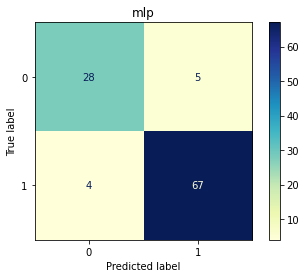

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.93      0.94      0.94        71

    accuracy                           0.91       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.91      0.91      0.91       104



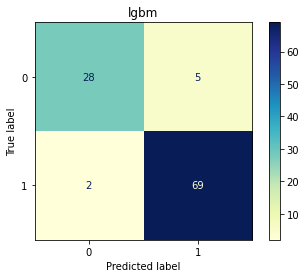

              precision    recall  f1-score   support

           0       0.93      0.85      0.89        33
           1       0.93      0.97      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.91      0.92       104
weighted avg       0.93      0.93      0.93       104



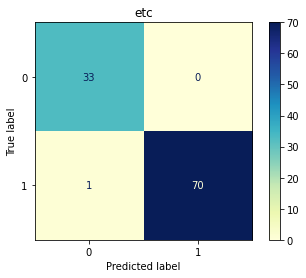

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



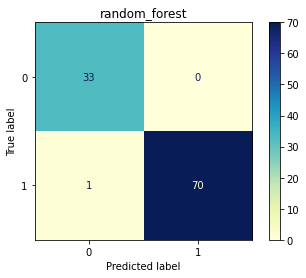

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



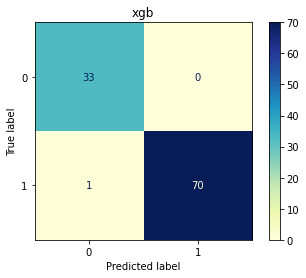

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
rocs = []
import seaborn as sn
for name, model in soft_models:
    y_pred = model.predict(X_test)

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

    cm_display.plot(cmap=plt.cm.YlGnBu,)
    plt.title(name)
    plt.show()
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    auc = metrics.roc_auc_score(y_test, y_pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)
    rocs.append([ name ,auc,false_positive_rate,true_positive_rate])


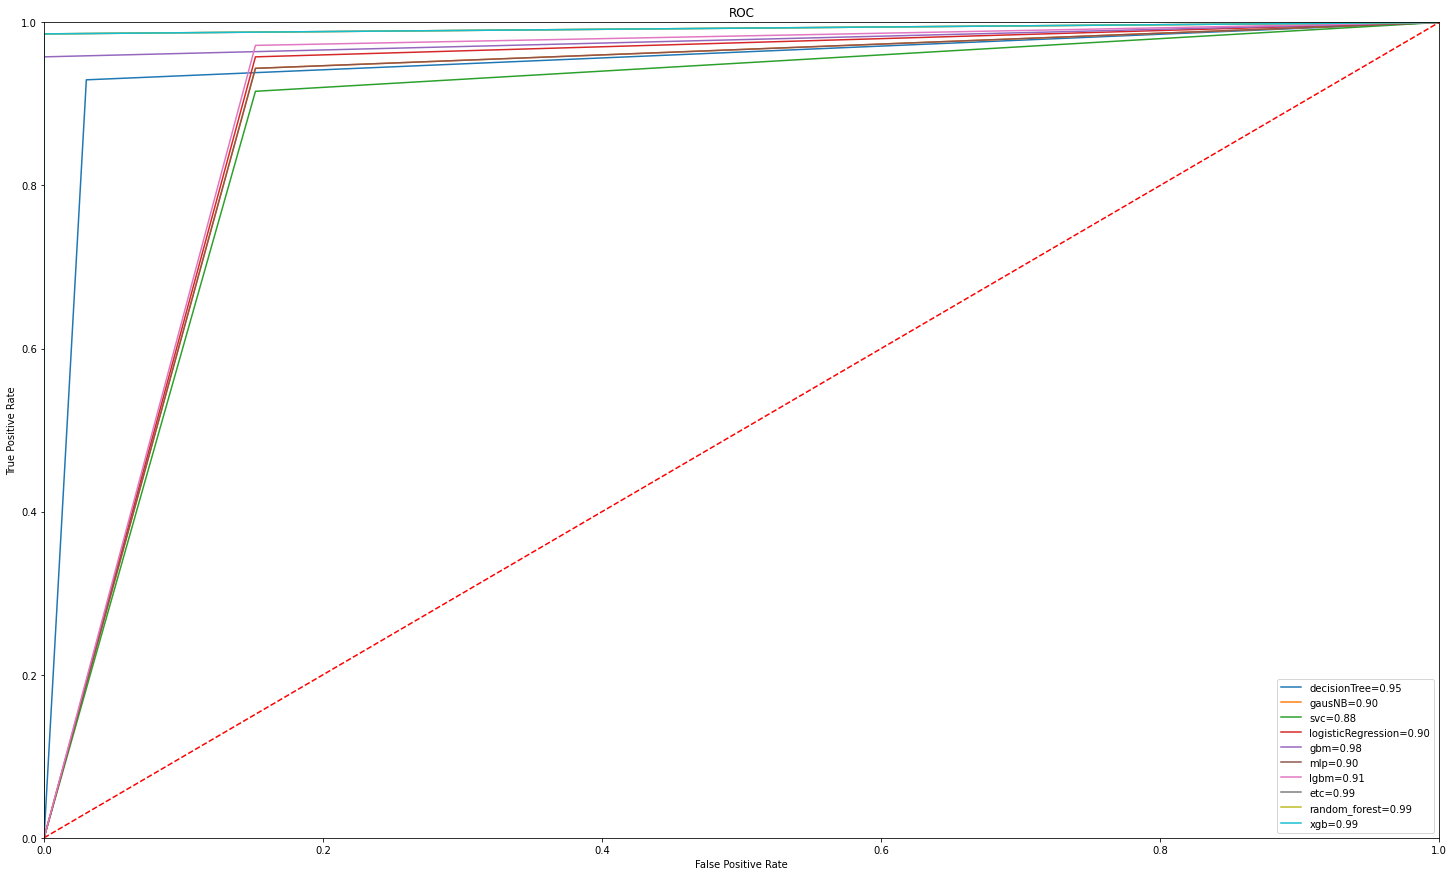

In [ ]:
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(25, 15))
plt.title('ROC')
for i in range(len(rocs)):
    plt.plot(rocs[i][2], rocs[i][3], label= rocs[i][0]+'=%0.2f' %rocs[i][1])
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()